#### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### Data Dictionary

<img src='data_dict.PNG'/>

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import sklearn.linear_model as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import warnings

warnings.filterwarnings('ignore')


In [2]:
default_palette=sns.color_palette("pastel")
default_palette

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

#### Data Understanding

In [3]:
data=pd.read_csv("C:\\Users\\meenaxi\\Desktop\\case_study_II_day.csv")

In [4]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [5]:
data.shape

(730, 16)

In [6]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
data.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

#### Total Number of Bikes Rented

In [9]:
np.sum(data['cnt'])

np.int64(3290845)

#### Total Number of Casual Users Renting Bikes

In [10]:
np.sum(data['casual'])

np.int64(619952)

#### Total Number of Registered Users Renting Bikes

In [11]:
np.sum(data['registered'])

np.int64(2670893)

#### Histplot of Rented Bikes

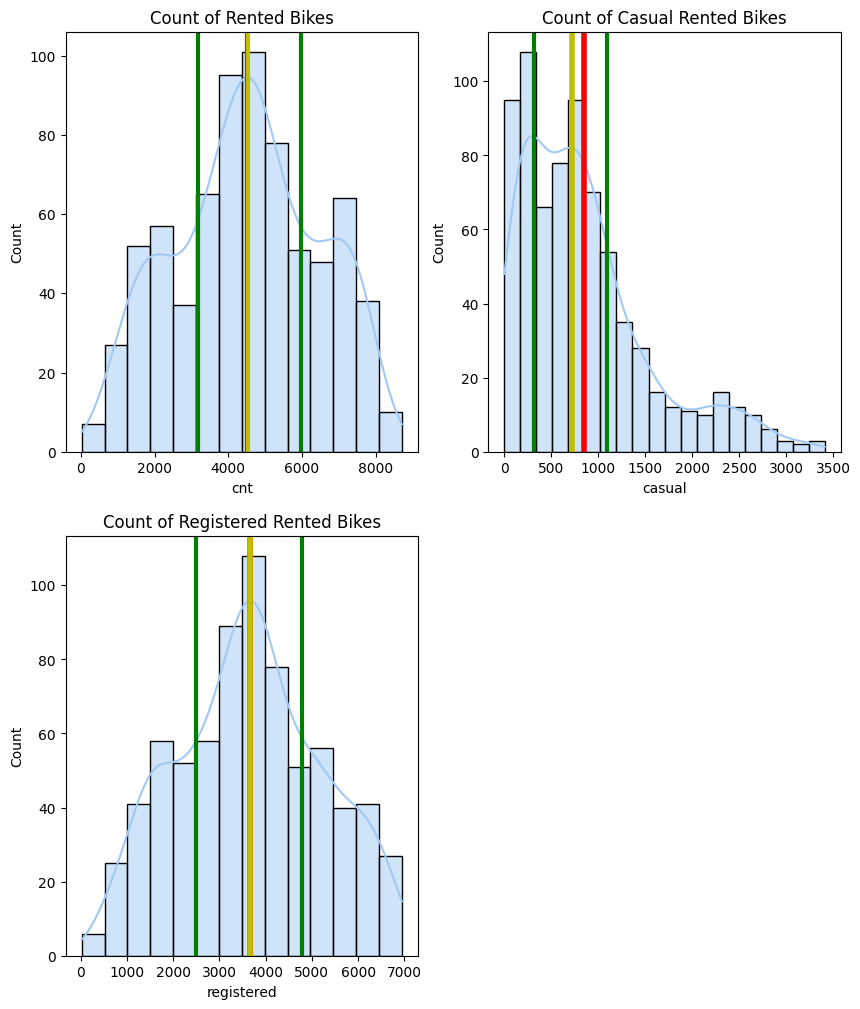

In [12]:
pyplot.figure(figsize=(10,12))
pyplot.subplot(2,2,1)
ax=sns.histplot(data['cnt'],kde=True,color=default_palette[0])
ax.axvline(x=data['cnt'].mean(),color='r',linewidth=3)
ax.axvline(x=data['cnt'].median(),color='y',linewidth=3)
ax.axvline(x=np.quantile(data['cnt'],0.25),color='g',linewidth=3)
ax.axvline(x=np.quantile(data['cnt'],0.75),color='g',linewidth=3)
ax.set_title("Count of Rented Bikes")
pyplot.subplot(2,2,2)
ax1=sns.histplot(data['casual'],kde=True,color=default_palette[0])
ax1.set_title("Count of Casual Rented Bikes")
ax1.axvline(x=data['casual'].mean(),color='r',linewidth=4)
ax1.axvline(x=data['casual'].median(),color='y',linewidth=4)
ax1.axvline(x=np.quantile(data['casual'],0.25),color='g',linewidth=3)
ax1.axvline(x=np.quantile(data['casual'],0.75),color='g',linewidth=3)
pyplot.subplot(2,2,3)
ax2=sns.histplot(data['registered'],kde=True,color=default_palette[0])
ax2.axvline(x=data['registered'].mean(),color='r',linewidth=4)
ax2.axvline(x=data['registered'].median(),color='y',linewidth=4)
ax2.axvline(x=np.quantile(data['registered'],0.25),color='g',linewidth=3)
ax2.axvline(x=np.quantile(data['registered'],0.75),color='g',linewidth=3)
ax2.set_title("Count of Registered Rented Bikes")
pyplot.show()

In [13]:
data[['casual','registered','cnt']].describe()

,casual,registered,cnt
count,730.000000,730.000000,730.000000
mean,849.249315,3658.757534,4508.006849
std,686.479875,1559.758728,1936.011647
min,2.000000,20.000000,22.000000
25%,316.250000,2502.250000,3169.750000
50%,717.000000,3664.500000,4548.500000
75%,1096.500000,4783.250000,5966.000000
max,3410.000000,6946.000000,8714.000000


##### Inference

<font color='brown'>
   1. 75th percentile of Rented bikes are around 6k for a given day <br/>
   2. 75th percentile of Casual bikes are as high as 4.8k for a given day <br/>
   3. The histogram peaks below 500 for casual, around 3500 for registered and above 4500 totally<br/>
</font>

#### Histplot of Temperature , Humidity , Windspeed

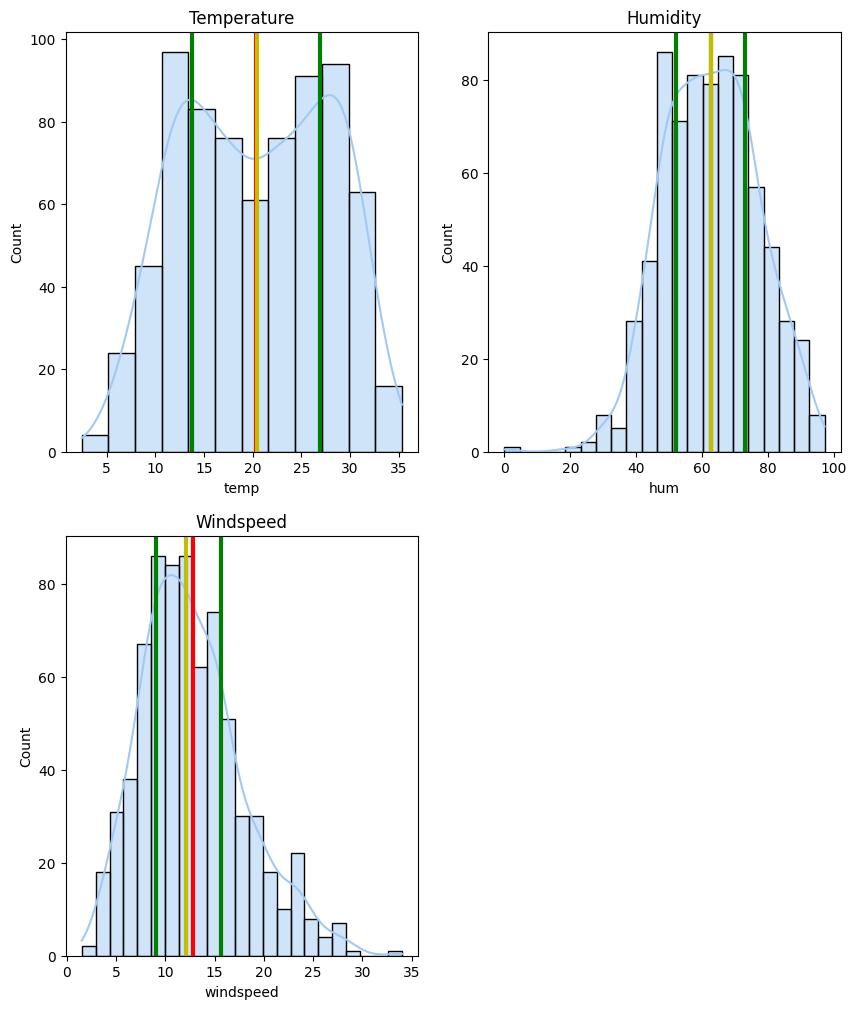

In [14]:
pyplot.figure(figsize=(10,12))
pyplot.subplot(2,2,1)
ax1=sns.histplot(data['temp'],kde=True,color=default_palette[0])
ax1.axvline(x=data['temp'].mean(),color='r',linewidth=3)
ax1.axvline(x=data['temp'].median(),color='y',linewidth=3)
ax1.axvline(x=np.quantile(data['temp'],0.25),color='g',linewidth=3)
ax1.axvline(x=np.quantile(data['temp'],0.75),color='g',linewidth=3)
ax1.set_title("Temperature")
pyplot.subplot(2,2,2)
ax2=sns.histplot(data['hum'],kde=True,color=default_palette[0])
ax2.axvline(x=data['hum'].mean(),color='r',linewidth=3)
ax2.axvline(x=data['hum'].median(),color='y',linewidth=3)
ax2.axvline(x=np.quantile(data['hum'],0.25),color='g',linewidth=3)
ax2.axvline(x=np.quantile(data['hum'],0.75),color='g',linewidth=3)
ax2.set_title("Humidity")
pyplot.subplot(2,2,3)
ax3=sns.histplot(data['windspeed'],kde=True,color=default_palette[0])
ax3.axvline(x=data['windspeed'].mean(),color='r',linewidth=3)
ax3.axvline(x=data['windspeed'].median(),color='y',linewidth=3)
ax3.axvline(x=np.quantile(data['windspeed'],0.25),color='g',linewidth=3)
ax3.axvline(x=np.quantile(data['windspeed'],0.75),color='g',linewidth=3)
ax3.set_title("Windspeed")
pyplot.show()

In [15]:
data[['temp','hum','windspeed']].describe()

,temp,hum,windspeed
count,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620
std,7.506729,14.237589,5.195841
min,2.424346,0.000000,1.500244
25%,13.811885,52.000000,9.041650
50%,20.465826,62.625000,12.125325
75%,26.880615,72.989575,15.625589
max,35.328347,97.250000,34.000021


##### Inference

<font color='brown'>
   1. The median temperature lies at around 20 celcius and max soars at 35 celcius<br/>
   2. 75th percentile of humidity lies around 72<br/>
   3. 75th percentile of windspeed lies around 15<br/>
   4. The histogram peaks are around 10-15 C and 25-30 C for temperature <br/>
   5. The histogram peaks are around 60 for humidity and 10-15 for windspeed<br/>
</font>

#### Derived Variables From the Date Column

##### Converting dteday to datetime Index

In [16]:
data['dteday']=pd.DatetimeIndex(data['dteday'])

In [17]:
data=data.sort_values(by='dteday')

In [18]:
data.dteday.min()

Timestamp('2018-01-01 00:00:00')

#### Calculating cumulative date difference from the start of yr 2018 till 2019

In [19]:
data['diff_in_days']=data['dteday']-data.dteday.min()

In [20]:
data.iloc[0]

instant                           1
dteday          2018-01-01 00:00:00
season                            1
yr                                0
mnth                              1
holiday                           0
weekday                           6
workingday                        0
weathersit                        2
temp                      14.110847
atemp                      18.18125
hum                         80.5833
windspeed                 10.749882
casual                          331
registered                      654
cnt                             985
diff_in_days        0 days 00:00:00
Name: 0, dtype: object

In [21]:
pd.DatetimeIndex(data['dteday']).inferred_freq

'D'

In [22]:
diff_days=[(data.iloc[i+1]['dteday']-data.iloc[i]['dteday']).days for i in range(0,len(data)-1)]
np.max(diff_days)

np.int64(1)

In [23]:
data['diff_in_days']=data['diff_in_days'].apply(lambda x:int(str(x).split(" ")[0]))

#### Other derived variables for EDA

In [24]:
data['year']=pd.DatetimeIndex(data['dteday']).year
data['month_name']=pd.DatetimeIndex(data['dteday']).month_name()
data['day_name']=pd.DatetimeIndex(data['dteday']).day_name()
data['month_start']=pd.DatetimeIndex(data['dteday']).is_month_start
data['month_end']=pd.DatetimeIndex(data['dteday']).is_month_end
data['year_end']=pd.DatetimeIndex(data['dteday']).is_year_end
data['year_start']=pd.DatetimeIndex(data['dteday']).is_year_start



In [25]:
data['7D sum']=data[['dteday','cnt']].rolling('7D',on='dteday').sum()['cnt']

In [26]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,cnt,diff_in_days,year,month_name,day_name,month_start,month_end,year_end,year_start,7D sum
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,...,985,0,2018,January,Monday,True,False,False,True,985.0
31,32,2018-01-02,1,0,2,0,2,1,2,7.879134,...,1360,1,2018,January,Tuesday,False,False,False,False,2345.0
59,60,2018-01-03,1,0,3,0,2,1,1,10.933347,...,1851,2,2018,January,Wednesday,False,False,False,False,4196.0
90,91,2018-01-04,2,0,4,0,5,1,2,12.300000,...,2227,3,2018,January,Thursday,False,False,False,False,6423.0
120,121,2018-01-05,2,0,5,0,0,0,2,18.518347,...,3351,4,2018,January,Friday,False,False,False,False,9774.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,1,12,0,4,1,2,10.420847,...,2114,725,2019,December,Friday,False,False,False,False,11647.0
726,727,2019-12-28,1,1,12,0,5,1,2,10.386653,...,3095,726,2019,December,Saturday,False,False,False,False,11119.0
727,728,2019-12-29,1,1,12,0,6,0,2,10.386653,...,1341,727,2019,December,Sunday,False,False,False,False,10711.0
728,729,2019-12-30,1,1,12,0,0,0,1,10.489153,...,1796,728,2019,December,Monday,False,False,False,False,10720.0


#### EDA

#### Yearwise Count of rental bikes

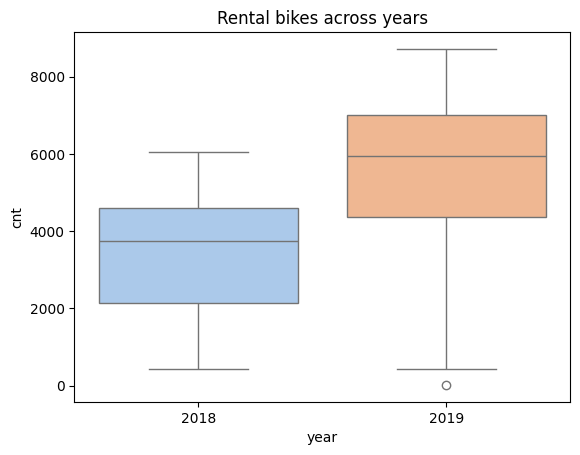

In [27]:

ax=sns.boxplot(data,x='year',y='cnt',palette=default_palette)
ax.set_title('Rental bikes across years')
pyplot.show()

#### Inference
<font color='brown'>
1. No of Rental bikes are high in the year 2019 . <br/>
2. The median for 2019 lies around 6k whereas for 2018 it lies around 4000 <br/>
3. The spread is somewhere between 2k to just above 4k in 2018 , where as 2019 shows a spread from 4k to > 6k <br/>
</font>

#### Season wise count of rental bikes

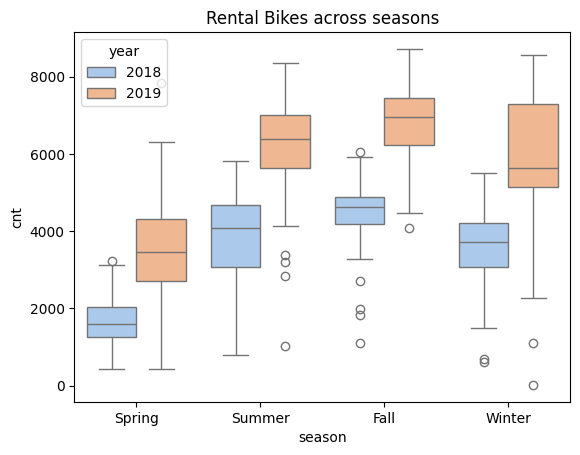

In [28]:
data['season']=pd.Categorical(data['season']).rename_categories(['Spring','Summer','Fall','Winter'])
ax=sns.boxplot(data,x='season',y='cnt',hue='year',palette=default_palette)
ax.set_title('Rental Bikes across seasons')
pyplot.show()

#### Inference
<font color='brown'>
1. There is a jump in number in the number of rented bikes in summer, fall. <br/>
2. The spread of rented bikes is high in each season in the year 2019 <br/>
</font>

#### Monthwise Distribution of Rental Bikes

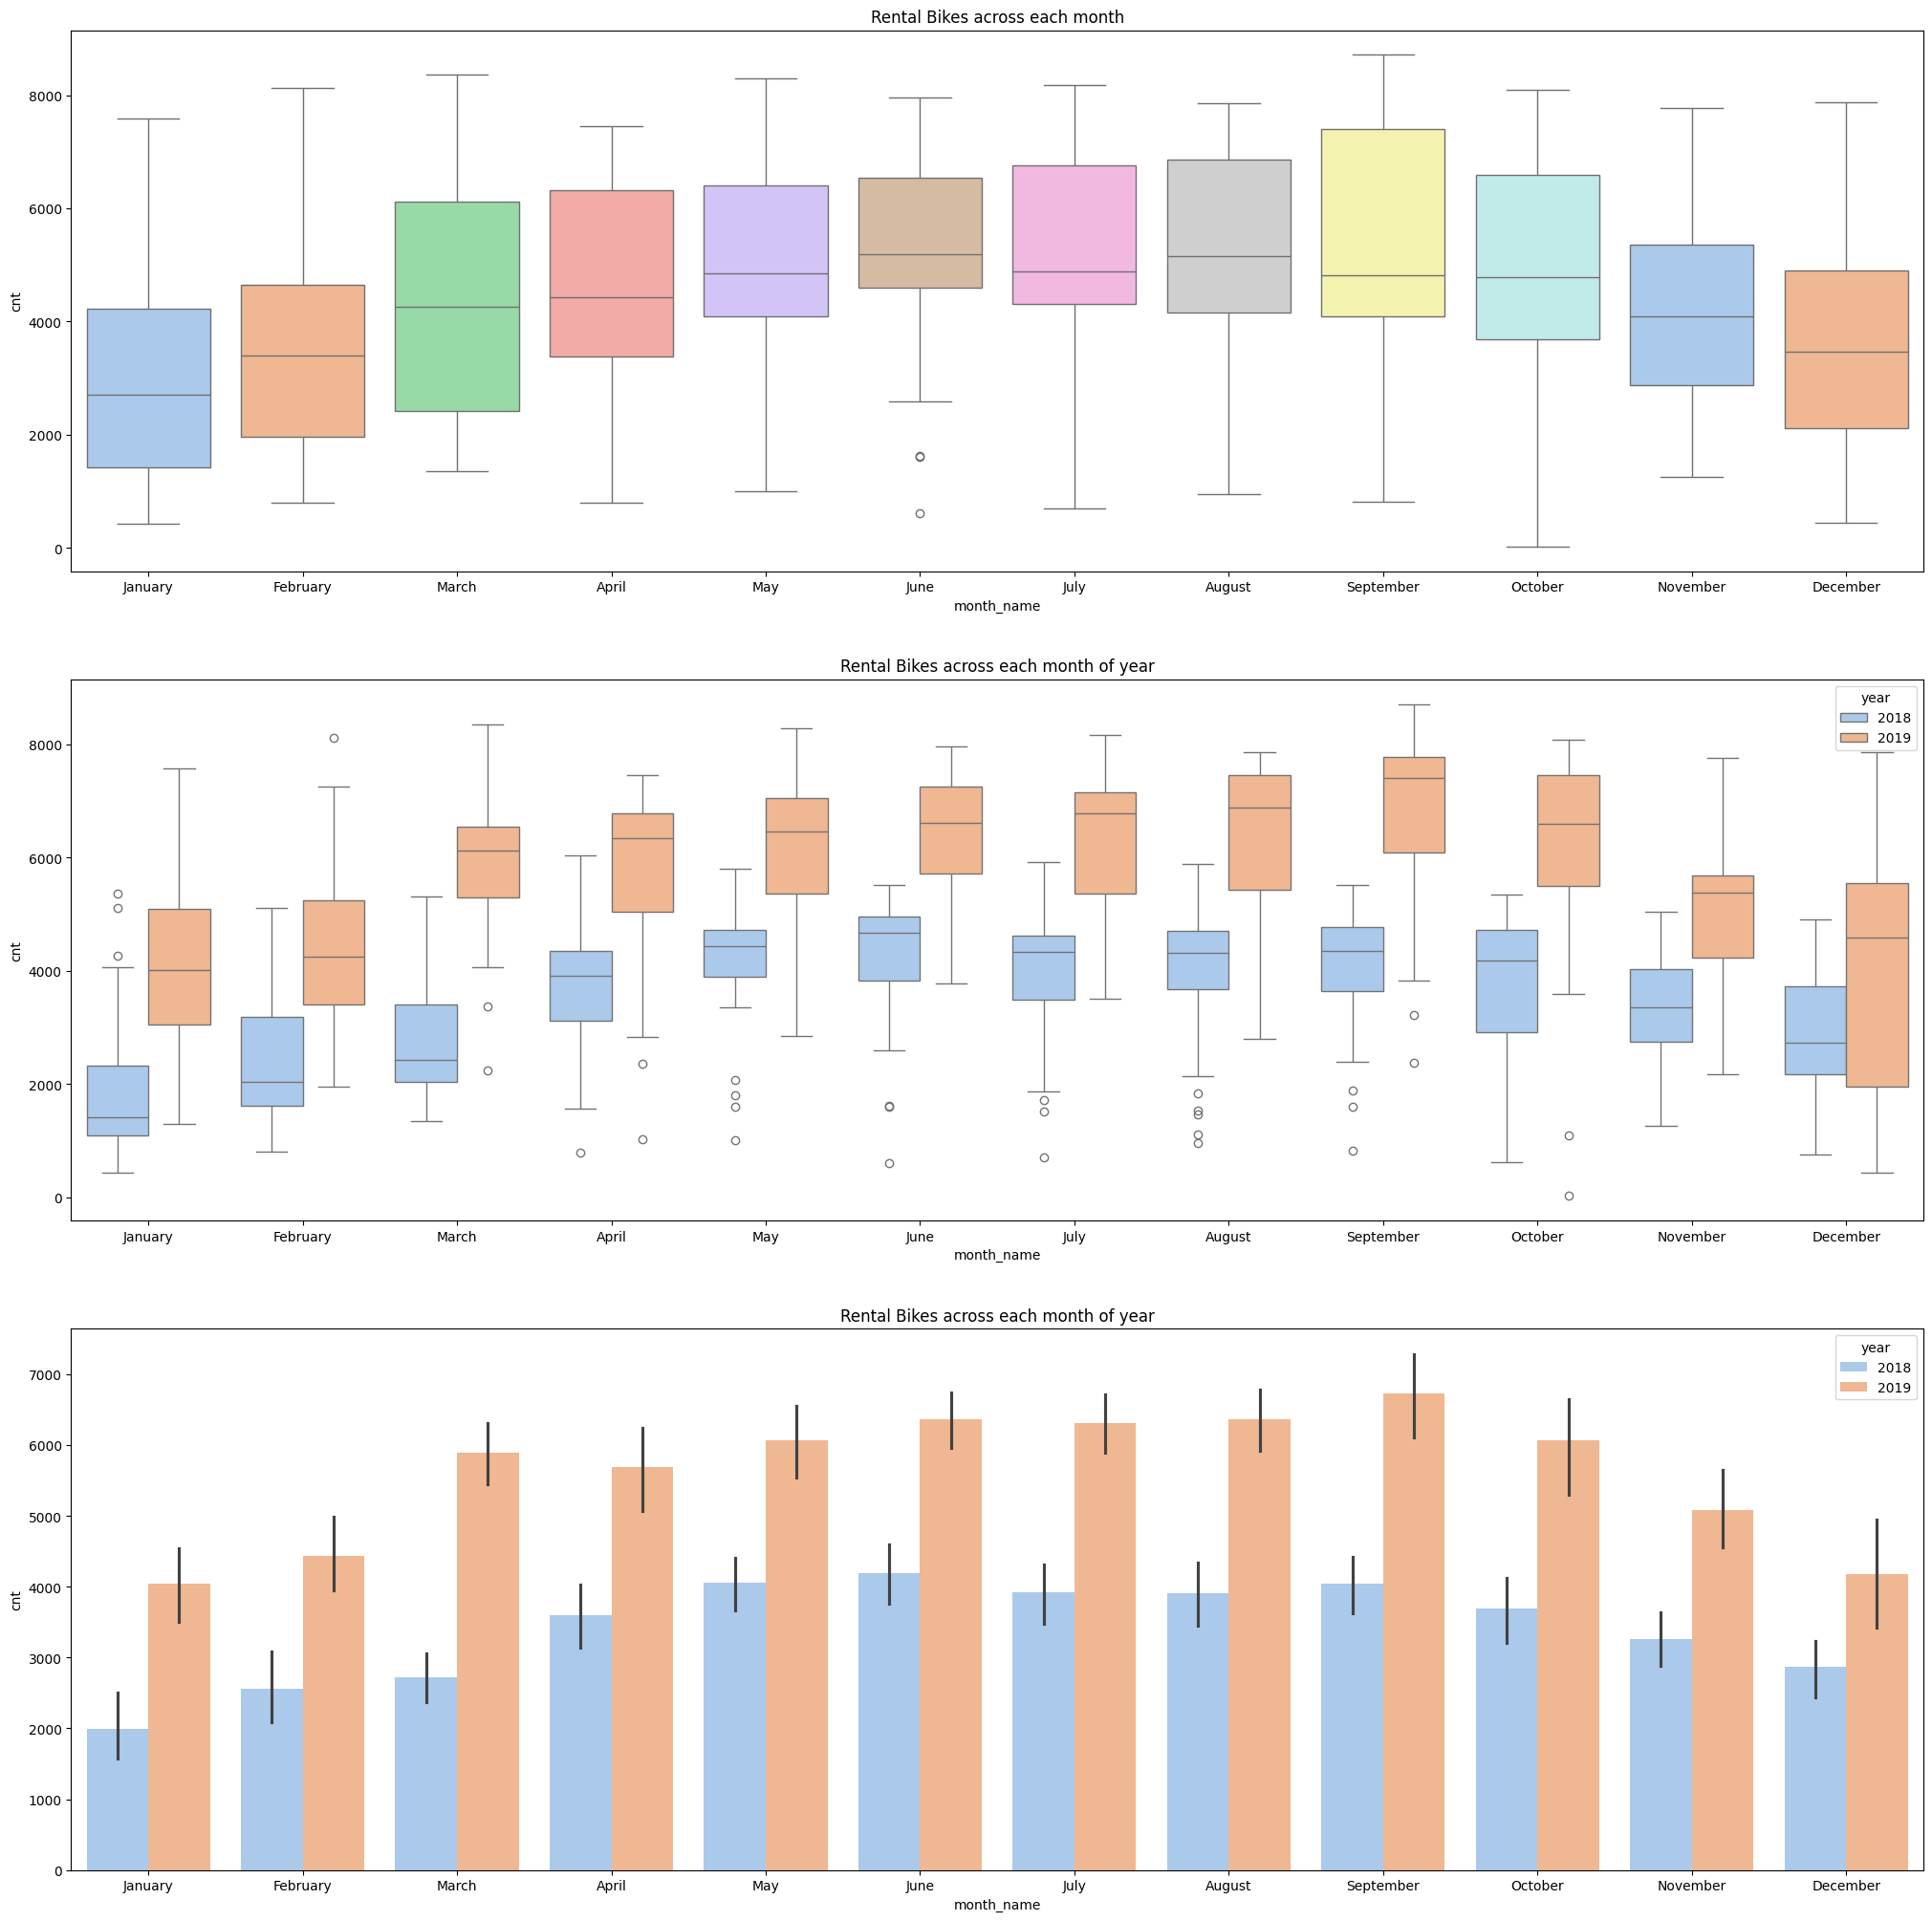

In [29]:
pyplot.figure(figsize=(25,25))
pyplot.subplot(3,1,1)
ax=sns.boxplot(data,x='month_name',y='cnt',palette=default_palette)
ax.set_title('Rental Bikes across each month')
pyplot.subplot(3,1,2)
ax2=sns.boxplot(data,x='month_name',y='cnt',hue='year',palette=default_palette)
ax2.set_title('Rental Bikes across each month of year')
pyplot.subplot(3,1,3)
ax3=sns.barplot(data,x='month_name',y='cnt',hue='year',palette=default_palette)
ax3.set_title('Rental Bikes across each month of year')
pyplot.show()

#### Inference
<font color='brown'>
1. The rental bike counts are gradually increasing from the year start, peaks in May-September timeframe <br/>
2. The spread in december 2019 is wider ranging below 2000 and above 4000     
</font>

#### Daywise Distribution of Rental Bikes


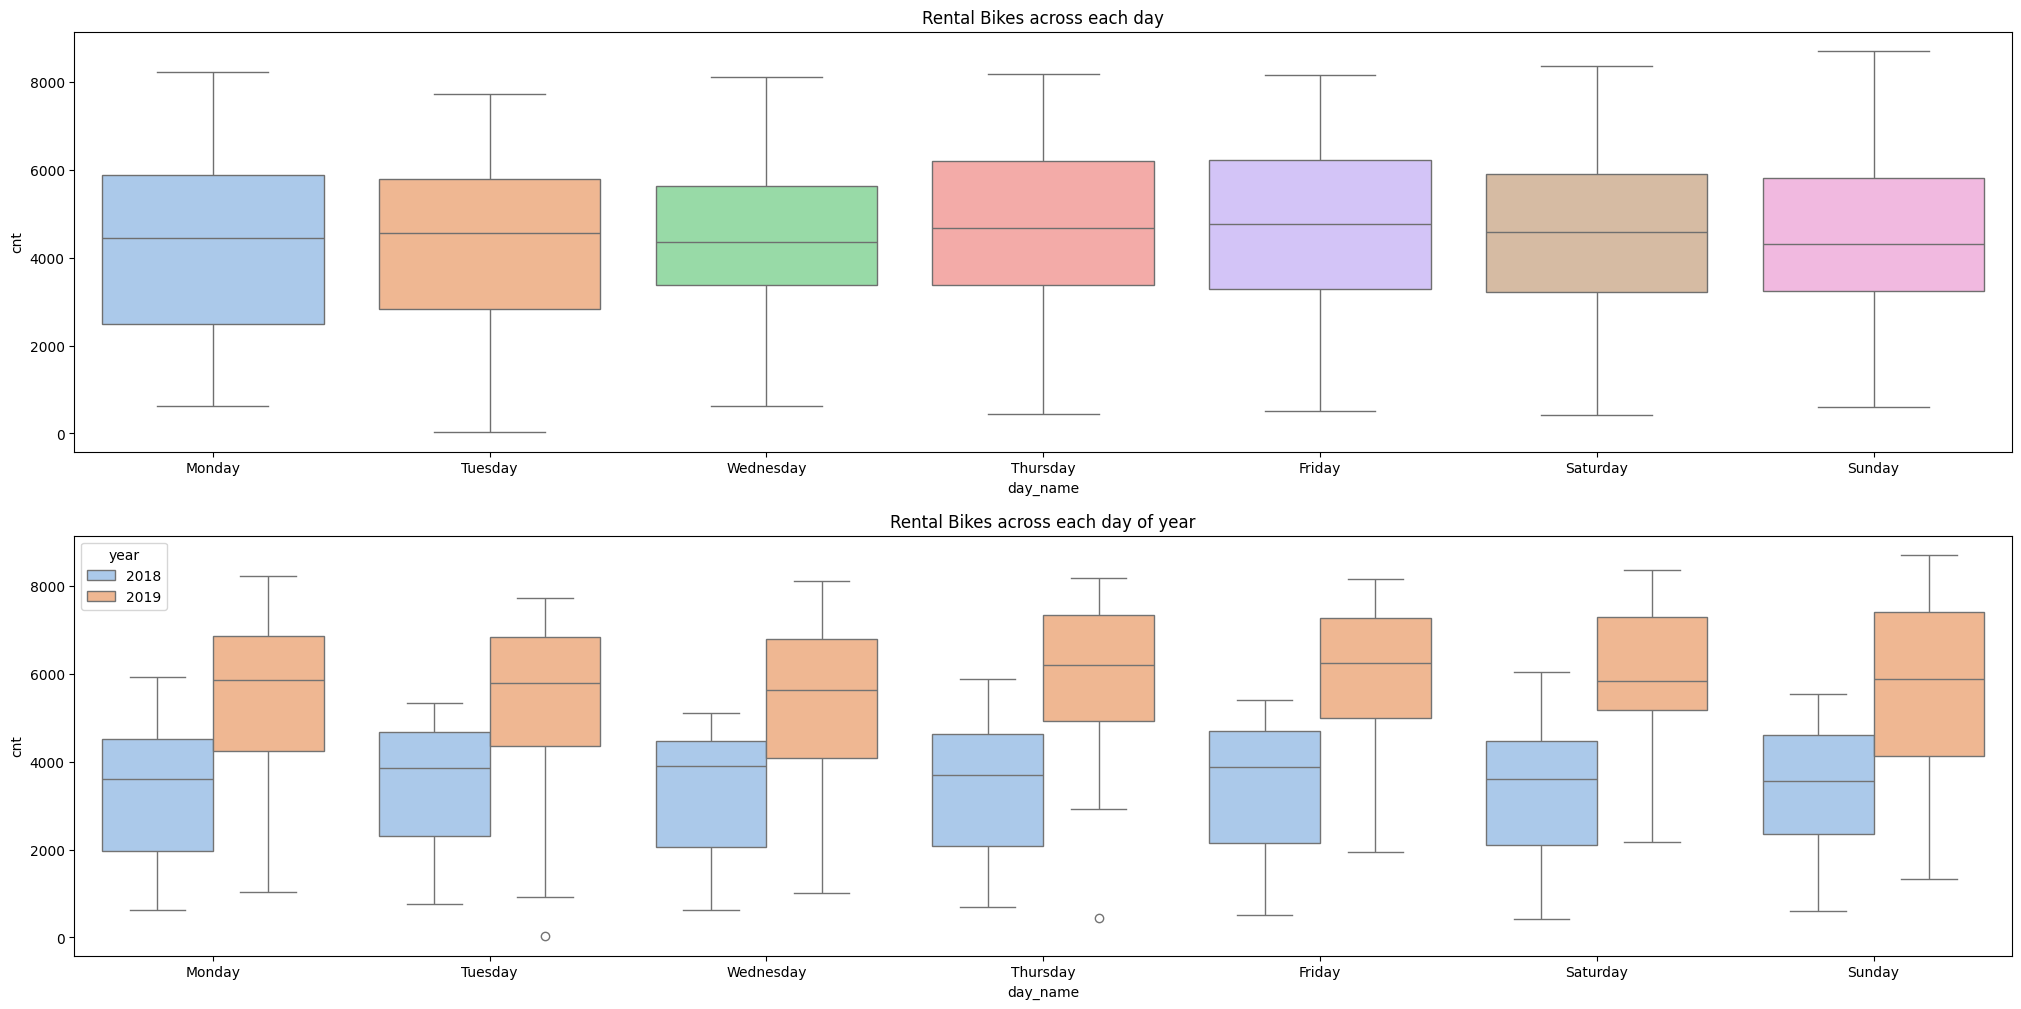

In [30]:

pyplot.figure(figsize=(25,12))
pyplot.subplot(2,1,1)
ax=sns.boxplot(data,x='day_name',y='cnt',palette=default_palette)
ax.set_title('Rental Bikes across each day')
pyplot.subplot(2,1,2)
ax2=sns.boxplot(data,x='day_name',y='cnt',hue='year',palette=default_palette)
ax2.set_title('Rental Bikes across each day of year')
pyplot.show()

#### Inference
<font color='brown'>
1. The median lies more or less same for the week <br/>
2. The spread is little thin on wednesdays, otherwise there does not seem to be a major difference <br/>
3. 2019s have wider spread on sunday ranging from 4k to > 6k
</font>

#### Rental Bikes in Holidays

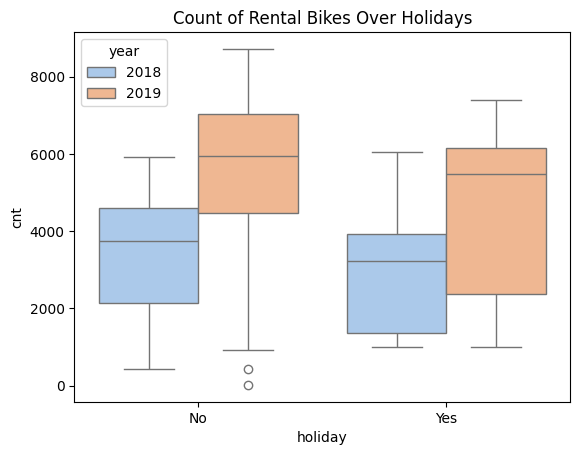

In [31]:
ax=sns.boxplot(data,x='holiday',y='cnt',palette=default_palette,hue='year')
ax.set_title("Count of Rental Bikes Over Holidays")
pyplot.xticks(ticks=[0,1],labels=['No','Yes'])
pyplot.show()

#### Inference
<font color='brown'>
1. Non holidays have the median higher than the holidays <br/>
2. Even the 25th percentile numbers are lesser compared to that of non holidays <br/>
</font>

#### Rental Bikes in Working days

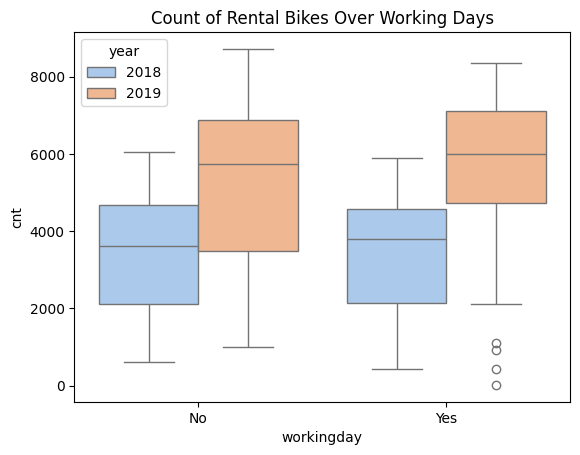

In [32]:
ax=sns.boxplot(data,x='workingday',y='cnt',palette=default_palette,hue='year')
ax.set_title("Count of Rental Bikes Over Working Days")
pyplot.xticks(ticks=[0,1],labels=['No','Yes'])
pyplot.show()

#### Inference
<font color='brown'>
1. The spread of 2018 seem to be same for working and non working days <br/>
2. The 2019 seems to have a jump in the 25th percentile numbers, the median is slightly higher than that of 2018<br/>
</font>

#### The distribution of Rental Bike as a factor of number of days passed from 2018

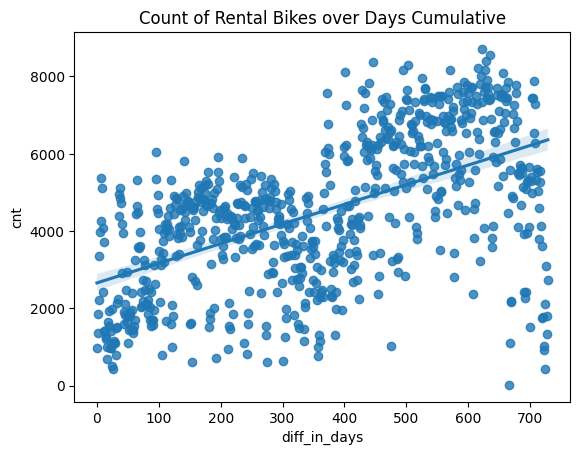

In [33]:
ax=sns.regplot(data,x='diff_in_days',y='cnt')
ax.set_title("Count of Rental Bikes over Days Cumulative")
pyplot.show()

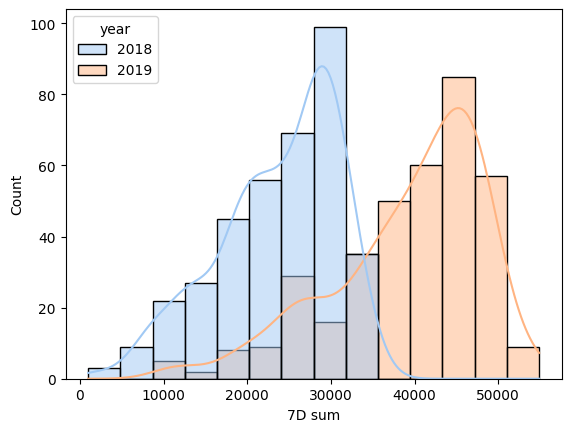

In [34]:
sns.histplot(data,x='7D sum',hue='year',kde=True,palette=default_palette)
ax.set_title("7 Day rolling count of Rental Bikes")
pyplot.show()

#### Fortnightly Trends in count of Rental Bikes across Years

In [35]:
data['bins']=pd.cut(data['diff_in_days'],bins=[15*x for x in range(-1,50)],labels=['fortnight_'+str(x) for x in range(-1,49)])

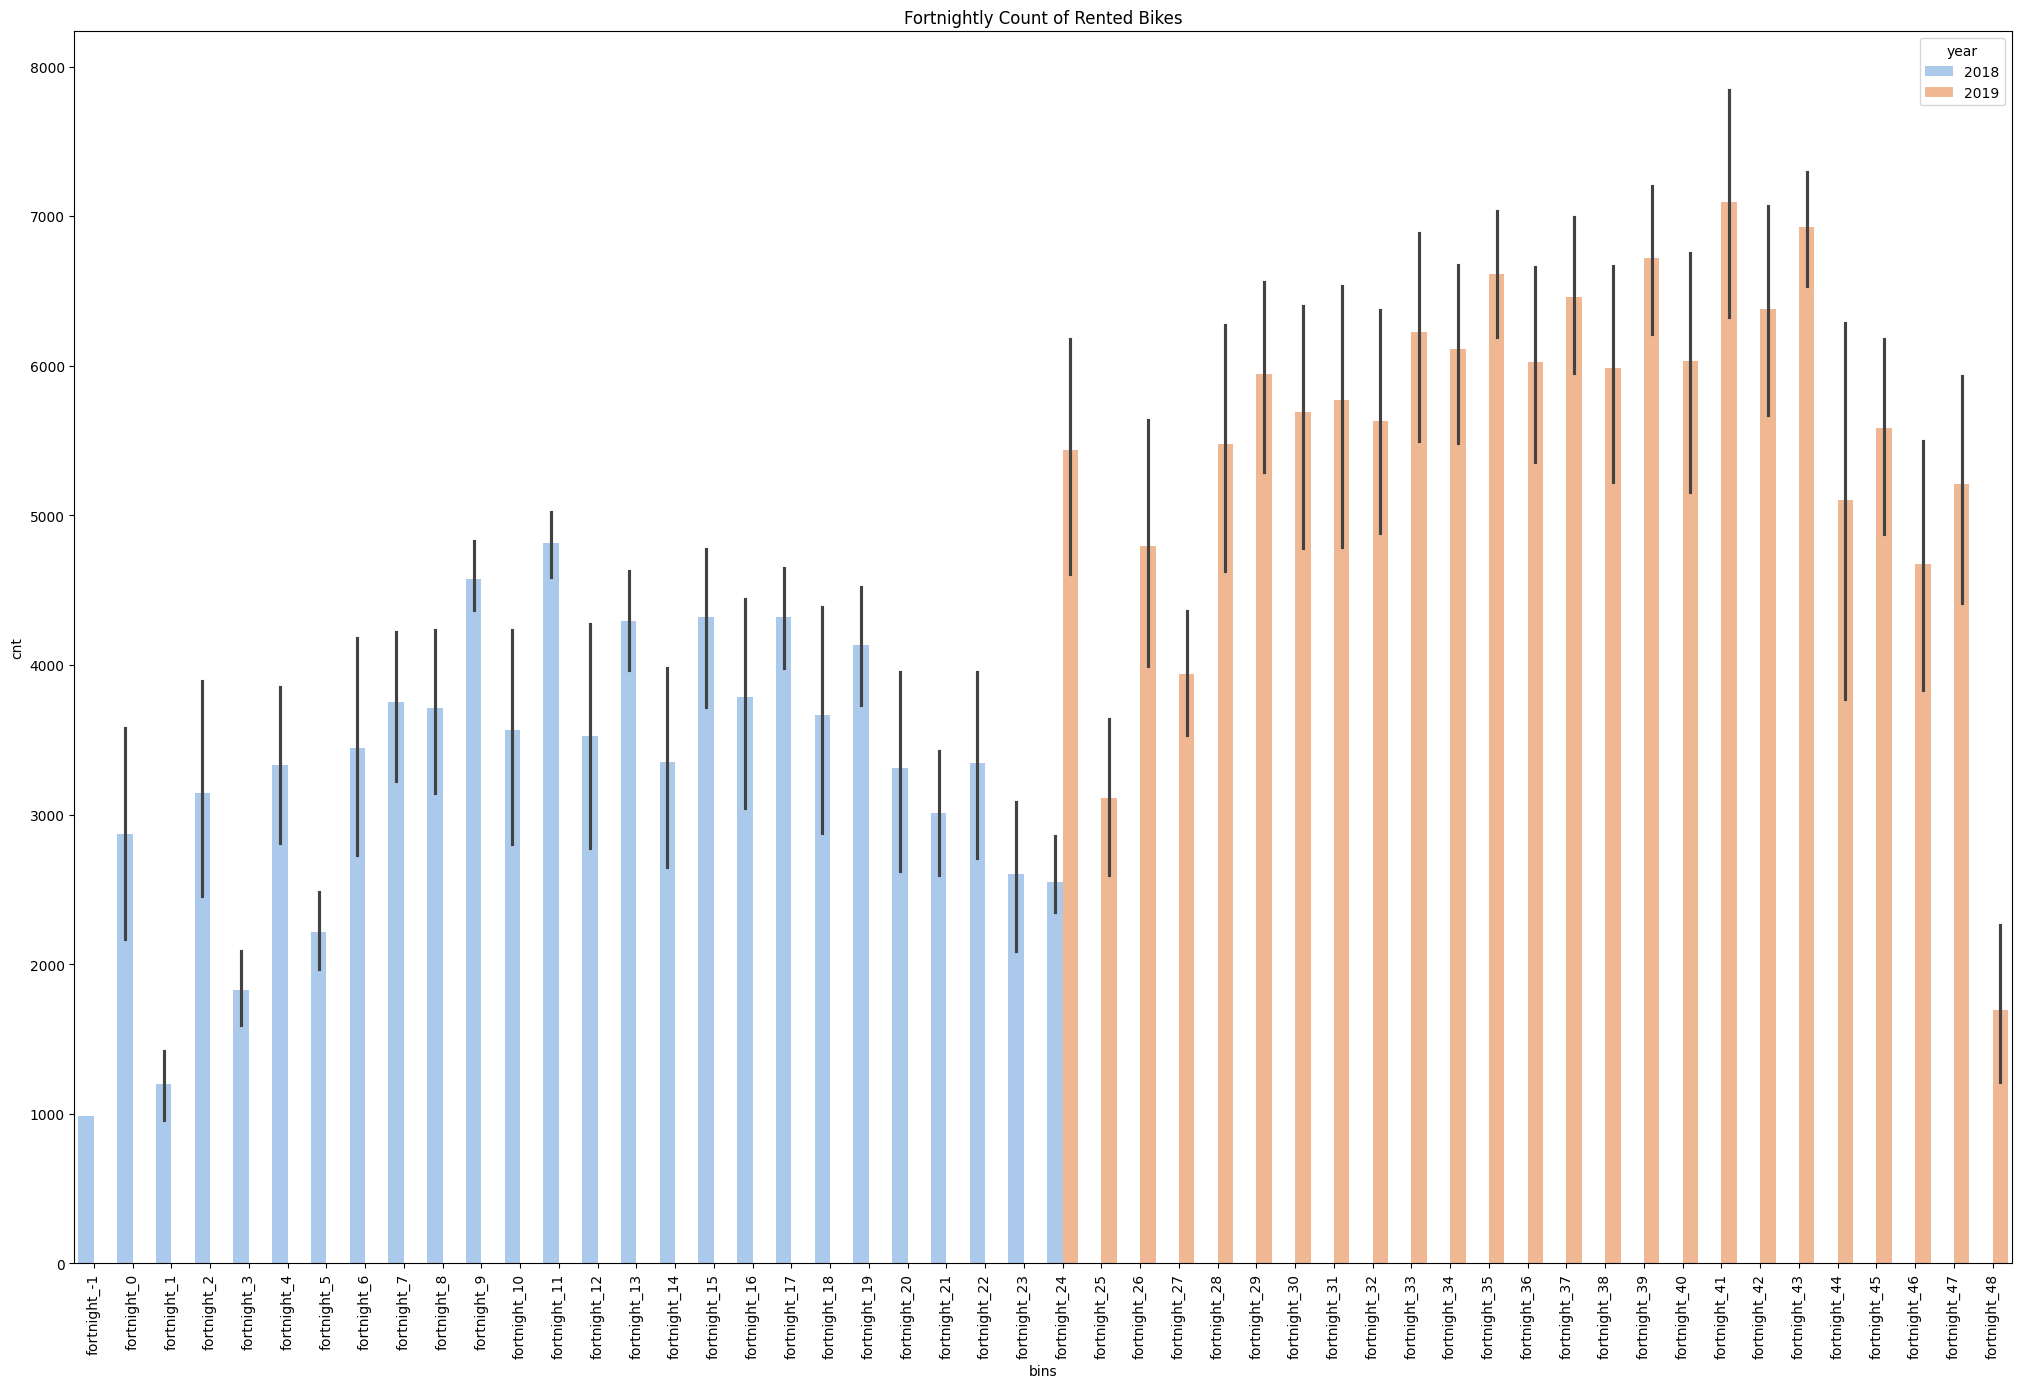

In [36]:
pyplot.figure(figsize=(25,16))
ax=sns.barplot(data,x='bins',y='cnt',hue='year',palette=default_palette)
ax.set_title("Fortnightly Count of Rented Bikes")
pyplot.xticks(rotation=90)
pyplot.show()

#### Inference
<font color='brown'>
1. The histplot for fortnightly trends shows the rented bikes are gradually increasing during year start and dipping on year end <br/>
2. The 7 Day rolling sum shows peaks are at 30 and 45k respectively<br/>
</font>

#### No of Rental Bikes w.r.t Month Start and Month End 

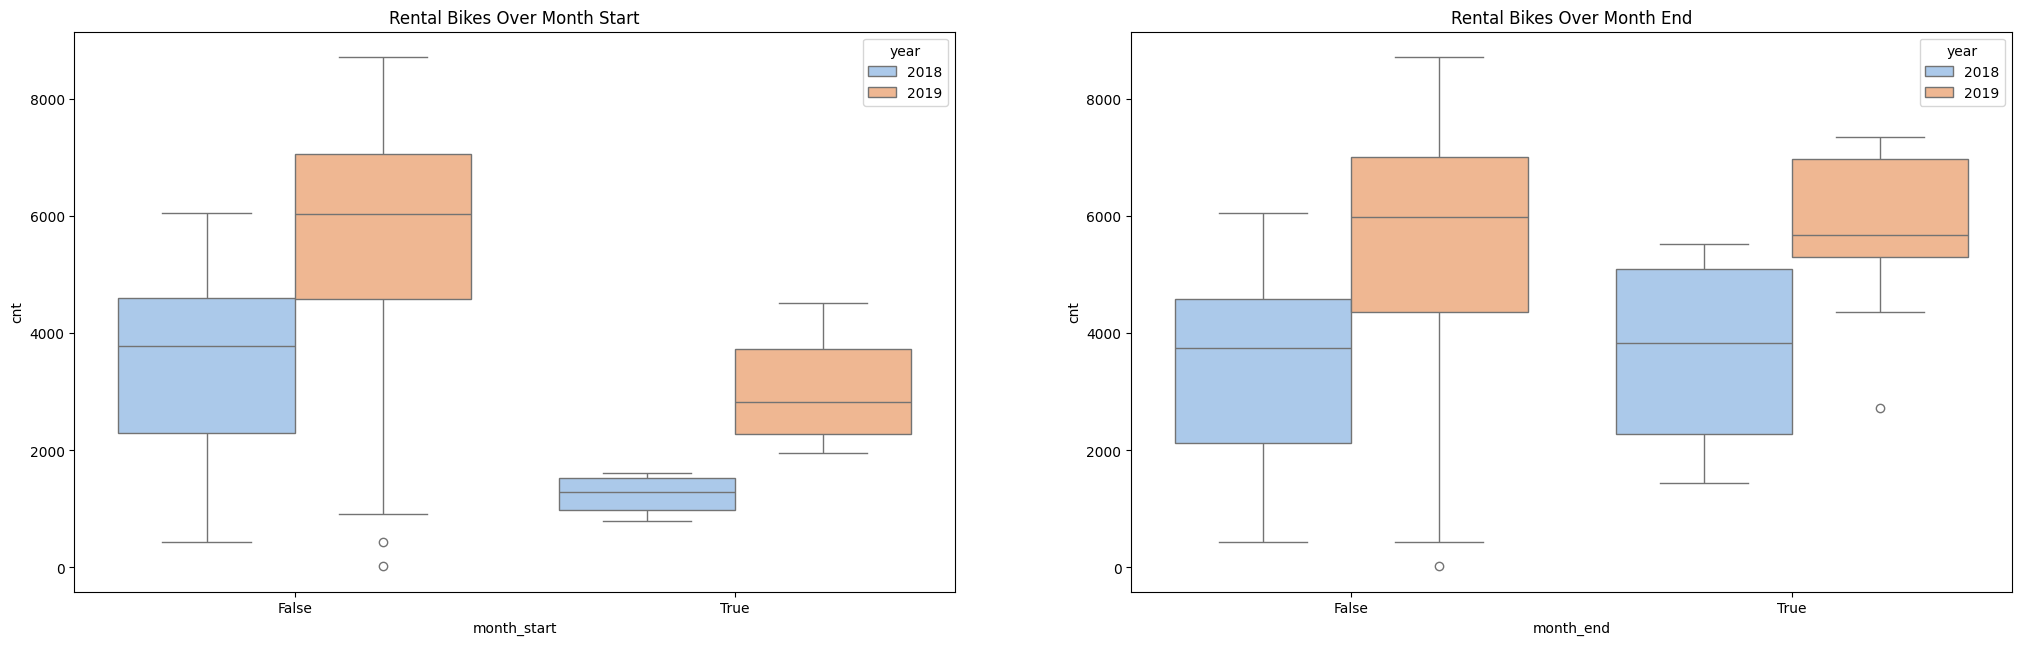

In [37]:
pyplot.figure(figsize=(25,16))
pyplot.subplot(2,2,1)
ax1=sns.boxplot(data,x='month_start',y='cnt',hue='year',palette=default_palette)
ax1.set_title("Rental Bikes Over Month Start")

pyplot.subplot(2,2,2)
ax2=sns.boxplot(data,x='month_end',y='cnt',hue='year',palette=default_palette)
ax2.set_title("Rental Bikes Over Month End")

pyplot.show()

<font color='brown'>
1. The box plot shows month start having very less spread compared to that of other days <br/>
2. However the same is not true for month end.
</font>

#### No of Rental Bikes w.r.t Year Start and Year End 

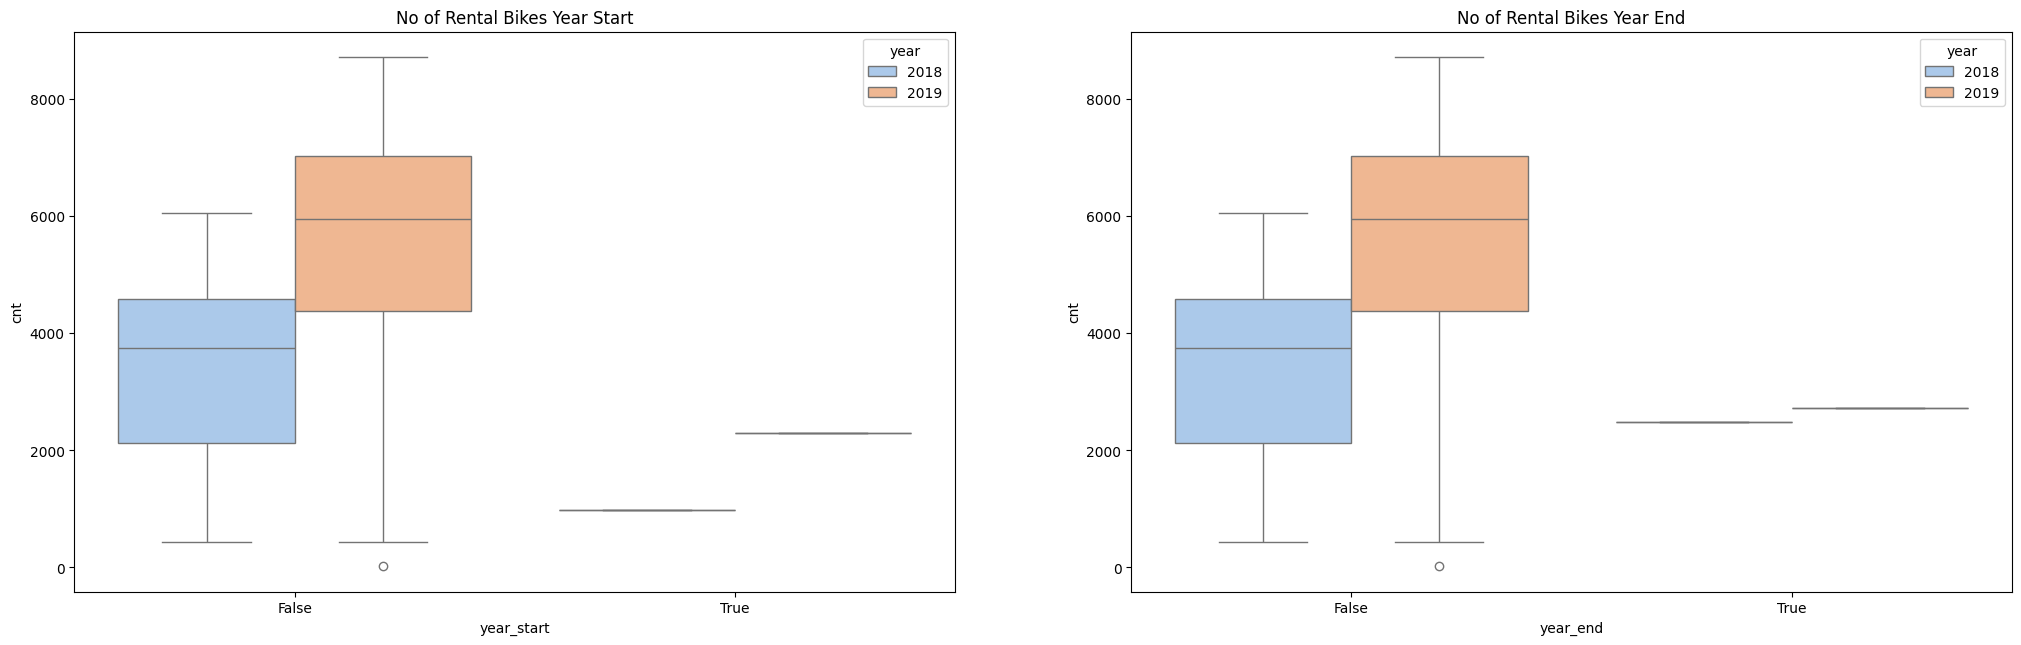

In [38]:
pyplot.figure(figsize=(25,16))
pyplot.subplot(2,2,1)
ax1=sns.boxplot(data,x='year_start',y='cnt',hue='year',palette=default_palette)
ax1.set_title("No of Rental Bikes Year Start")
pyplot.subplot(2,2,2)
ax2=sns.boxplot(data,x='year_end',y='cnt',hue='year',palette=default_palette)
ax2.set_title("No of Rental Bikes Year End")
pyplot.show()

#### Inference
<font color='brown'>
1. The year start and year end does not show a significant impact <br/>
</font>

#### No of Rental Bikes Based on the Weather Type

In [39]:
data['weathersit']=data['weathersit'].astype("category")
data['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [40]:
data['weather_desc']=pd.Categorical(data['weathersit']).rename_categories(['Cloudy','Misty','Snowy'])

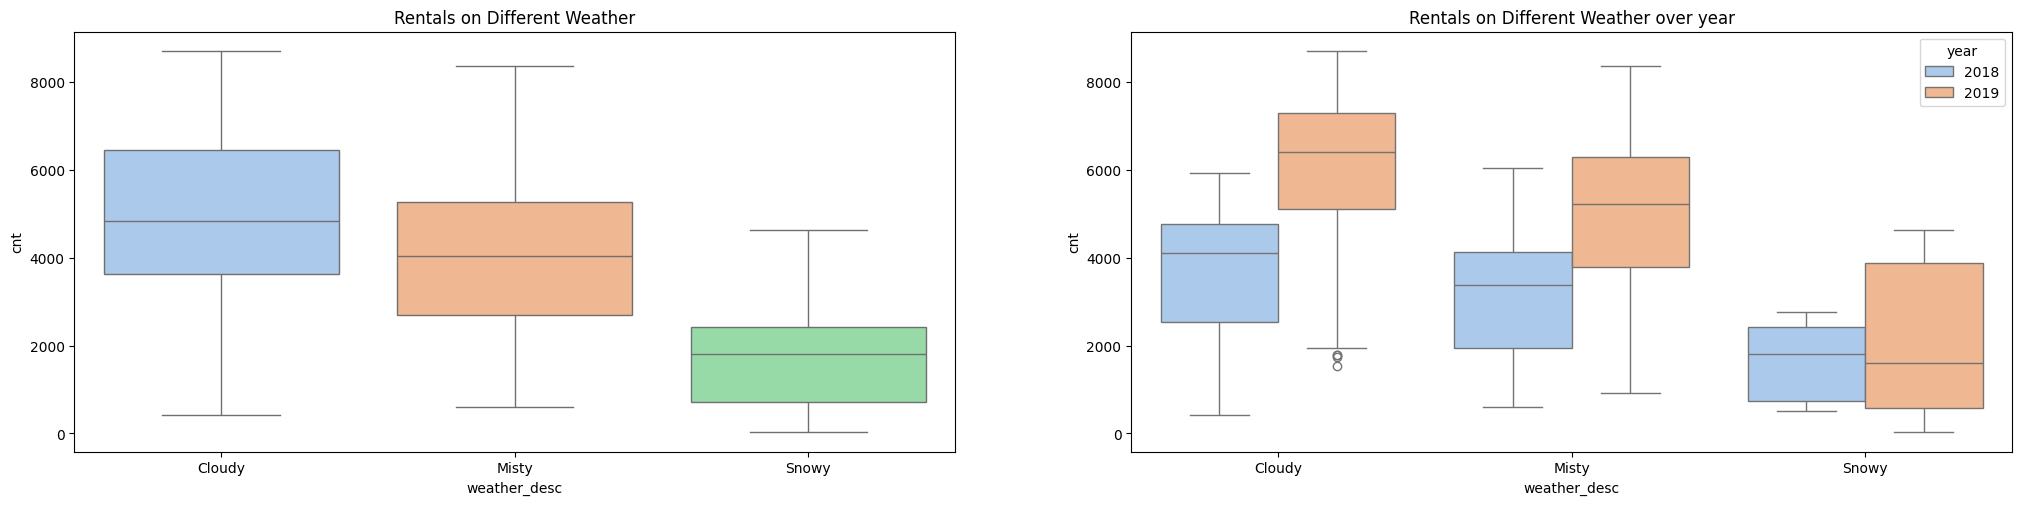

In [41]:
pyplot.figure(figsize=(25,12))
pyplot.subplot(2,2,1)
ax=sns.boxplot(data,x='weather_desc',y='cnt',palette=default_palette)
ax.set_title("Rentals on Different Weather")
pyplot.subplot(2,2,2)
ax2=sns.boxplot(data,x='weather_desc',y='cnt',hue='year',palette=default_palette)
ax2.set_title("Rentals on Different Weather over year")
pyplot.show()

#### Inference
<font color='brown'>
1. The bike rentals are dipping as the weather tends towards Misty and Snowy.<br/>
</font>

#### No of Casual and Registered Users

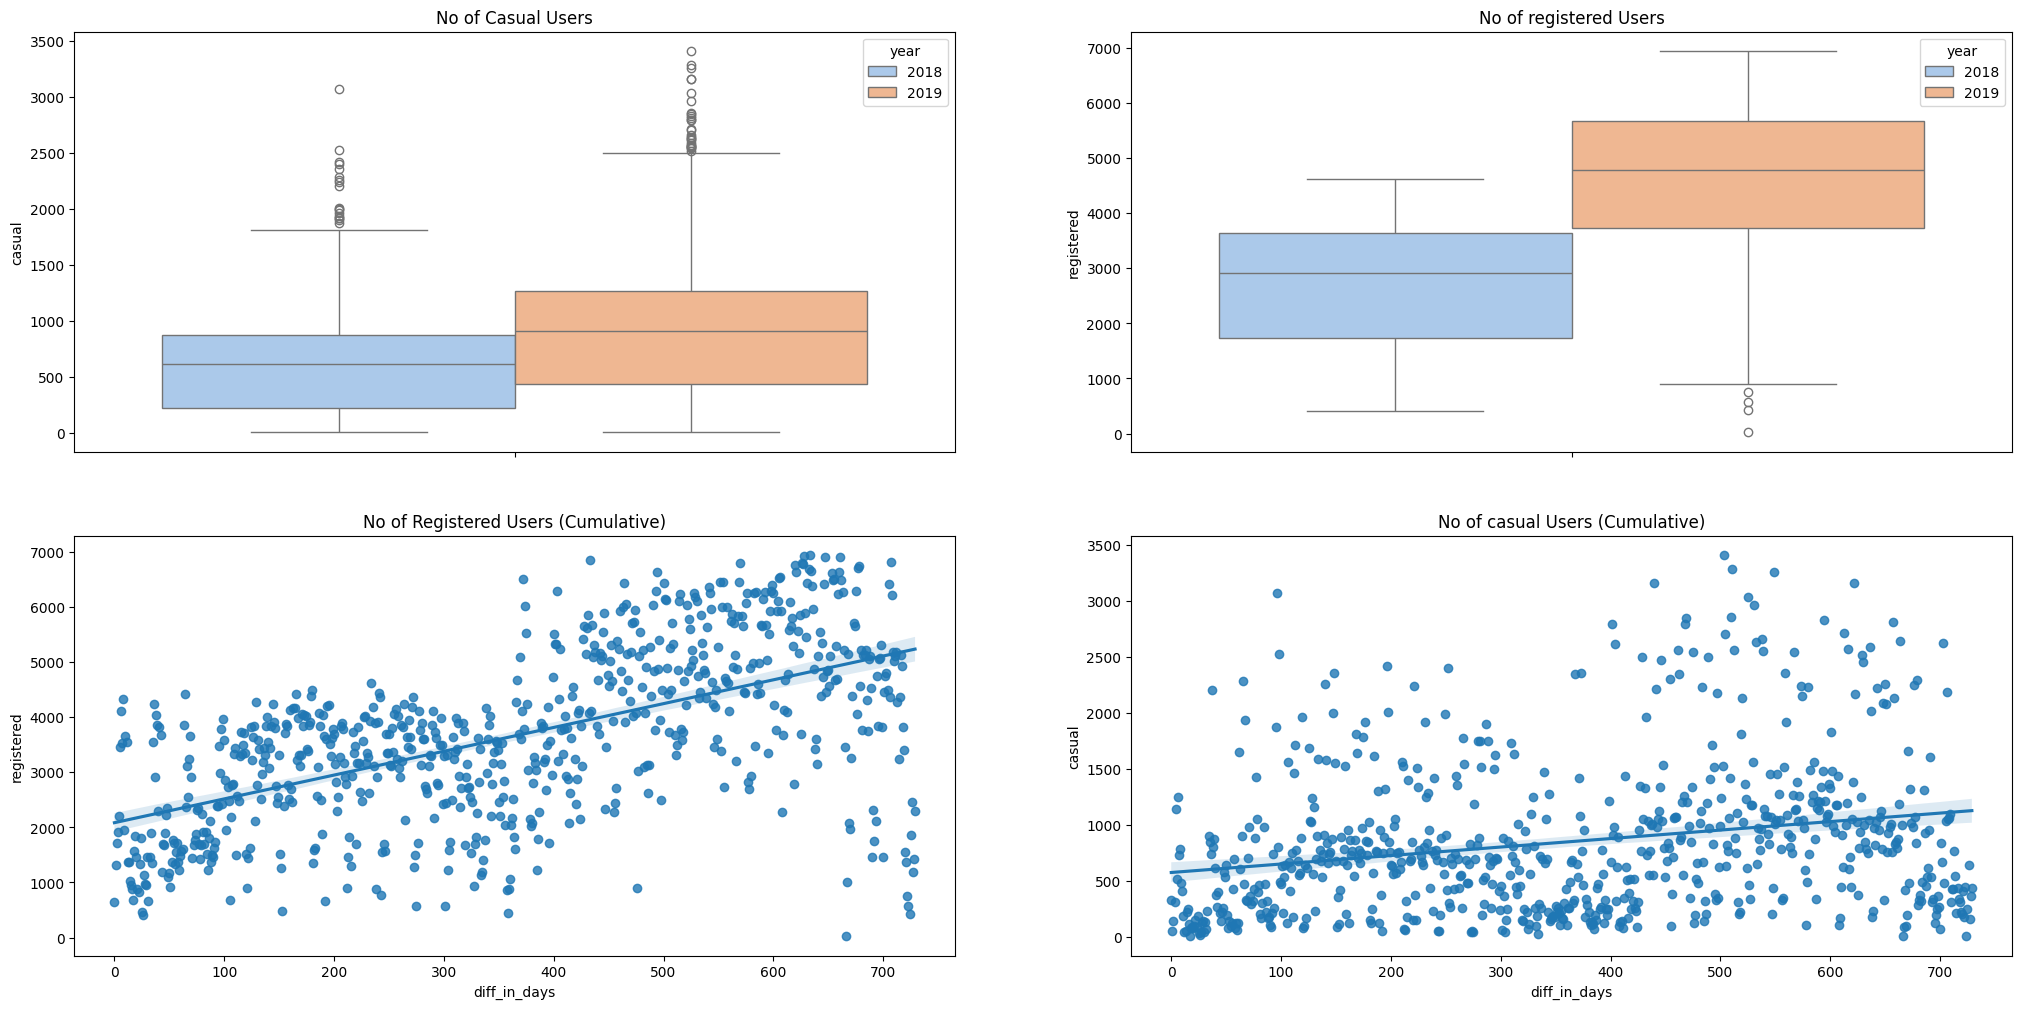

In [42]:
pyplot.figure(figsize=(25,12))

pyplot.subplot(2,2,1)
ax1=sns.boxplot(data,y='casual',hue='year',palette=default_palette)
ax1.set_title("No of Casual Users")

pyplot.subplot(2,2,2)
ax2=sns.boxplot(data,y='registered',hue='year',palette=default_palette)
ax2.set_title("No of registered Users")

pyplot.subplot(2,2,3)
ax3=sns.regplot(data,x='diff_in_days',y='registered')
ax3.set_title("No of Registered Users (Cumulative)")

pyplot.subplot(2,2,4)
ax4=sns.regplot(data,x='diff_in_days',y='casual')
ax4.set_title("No of casual Users (Cumulative)")

pyplot.show()

#### Effect of Temperature, Humidity, Windspeed on Rental Bike Count

In [43]:
data['temp'].describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

In [44]:
data['atemp'].describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

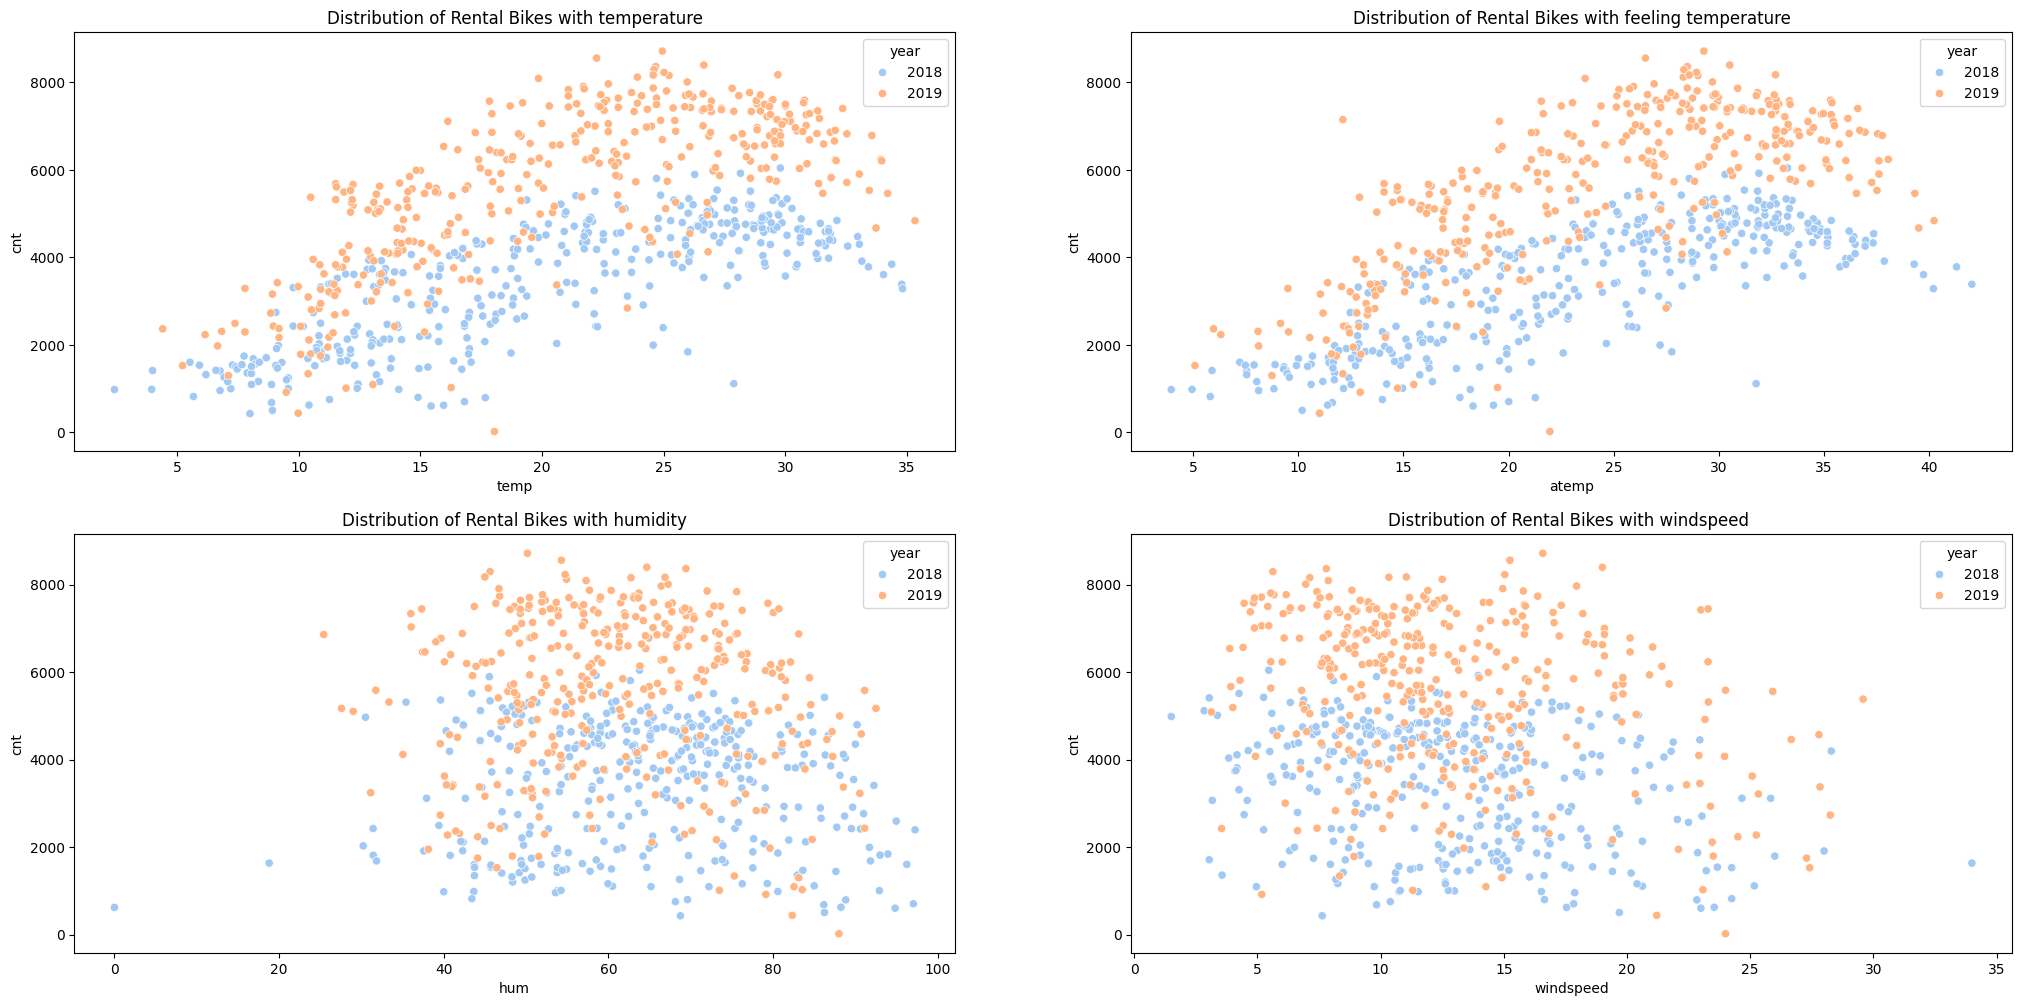

In [45]:
pyplot.figure(figsize=(25,25))

pyplot.subplot(4,2,1)
ax=sns.scatterplot(data,x='temp',y='cnt',hue='year',palette=default_palette)
ax.set_title("Distribution of Rental Bikes with temperature")

pyplot.subplot(4,2,2)
ax2=sns.scatterplot(data,x='atemp',y='cnt',hue='year',palette=default_palette)
ax2.set_title("Distribution of Rental Bikes with feeling temperature")


pyplot.subplot(4,2,3)
ax3=sns.scatterplot(data,x='hum',y='cnt',hue='year',palette=default_palette)
ax3.set_title("Distribution of Rental Bikes with humidity")

pyplot.subplot(4,2,4)
ax4=sns.scatterplot(data,x='windspeed',y='cnt',hue='year',palette=default_palette)
ax4.set_title("Distribution of Rental Bikes with windspeed ")
pyplot.show()


#### Inference
<font color='brown'>
    1. The temperature and feeling temperature shows a linear relationship with number of rented bikes  <br/>
    2. The humidity, windspeed doesnot explain much of linear relationship, but there is a downward trend in the x-axis mainly visible for year 2019  <br/>
</font>

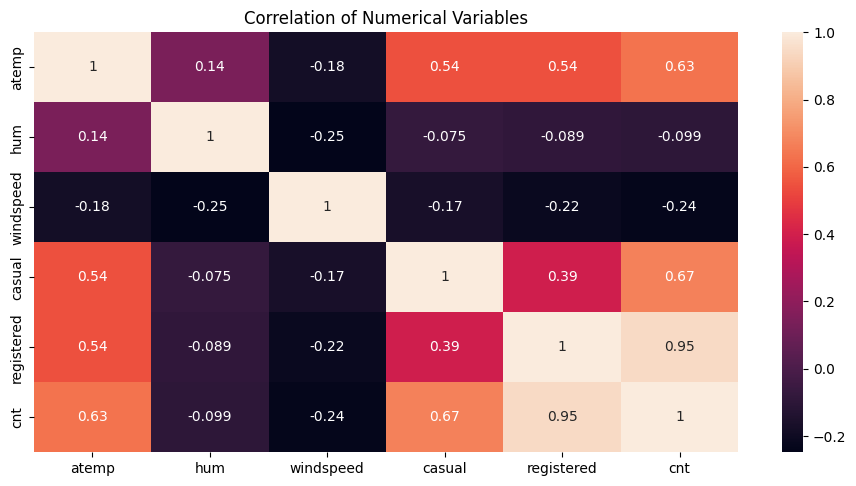

In [46]:
pyplot.figure(figsize=(25,12))
pyplot.subplot(2,2,1)
ax=sns.heatmap(data[['atemp','hum','windspeed','casual','registered','cnt']].corr(),annot=True)
ax.set_title("Correlation of Numerical Variables")
pyplot.show()

#### Observing if there are any differences in temperature , humidity between 2018 and 2019

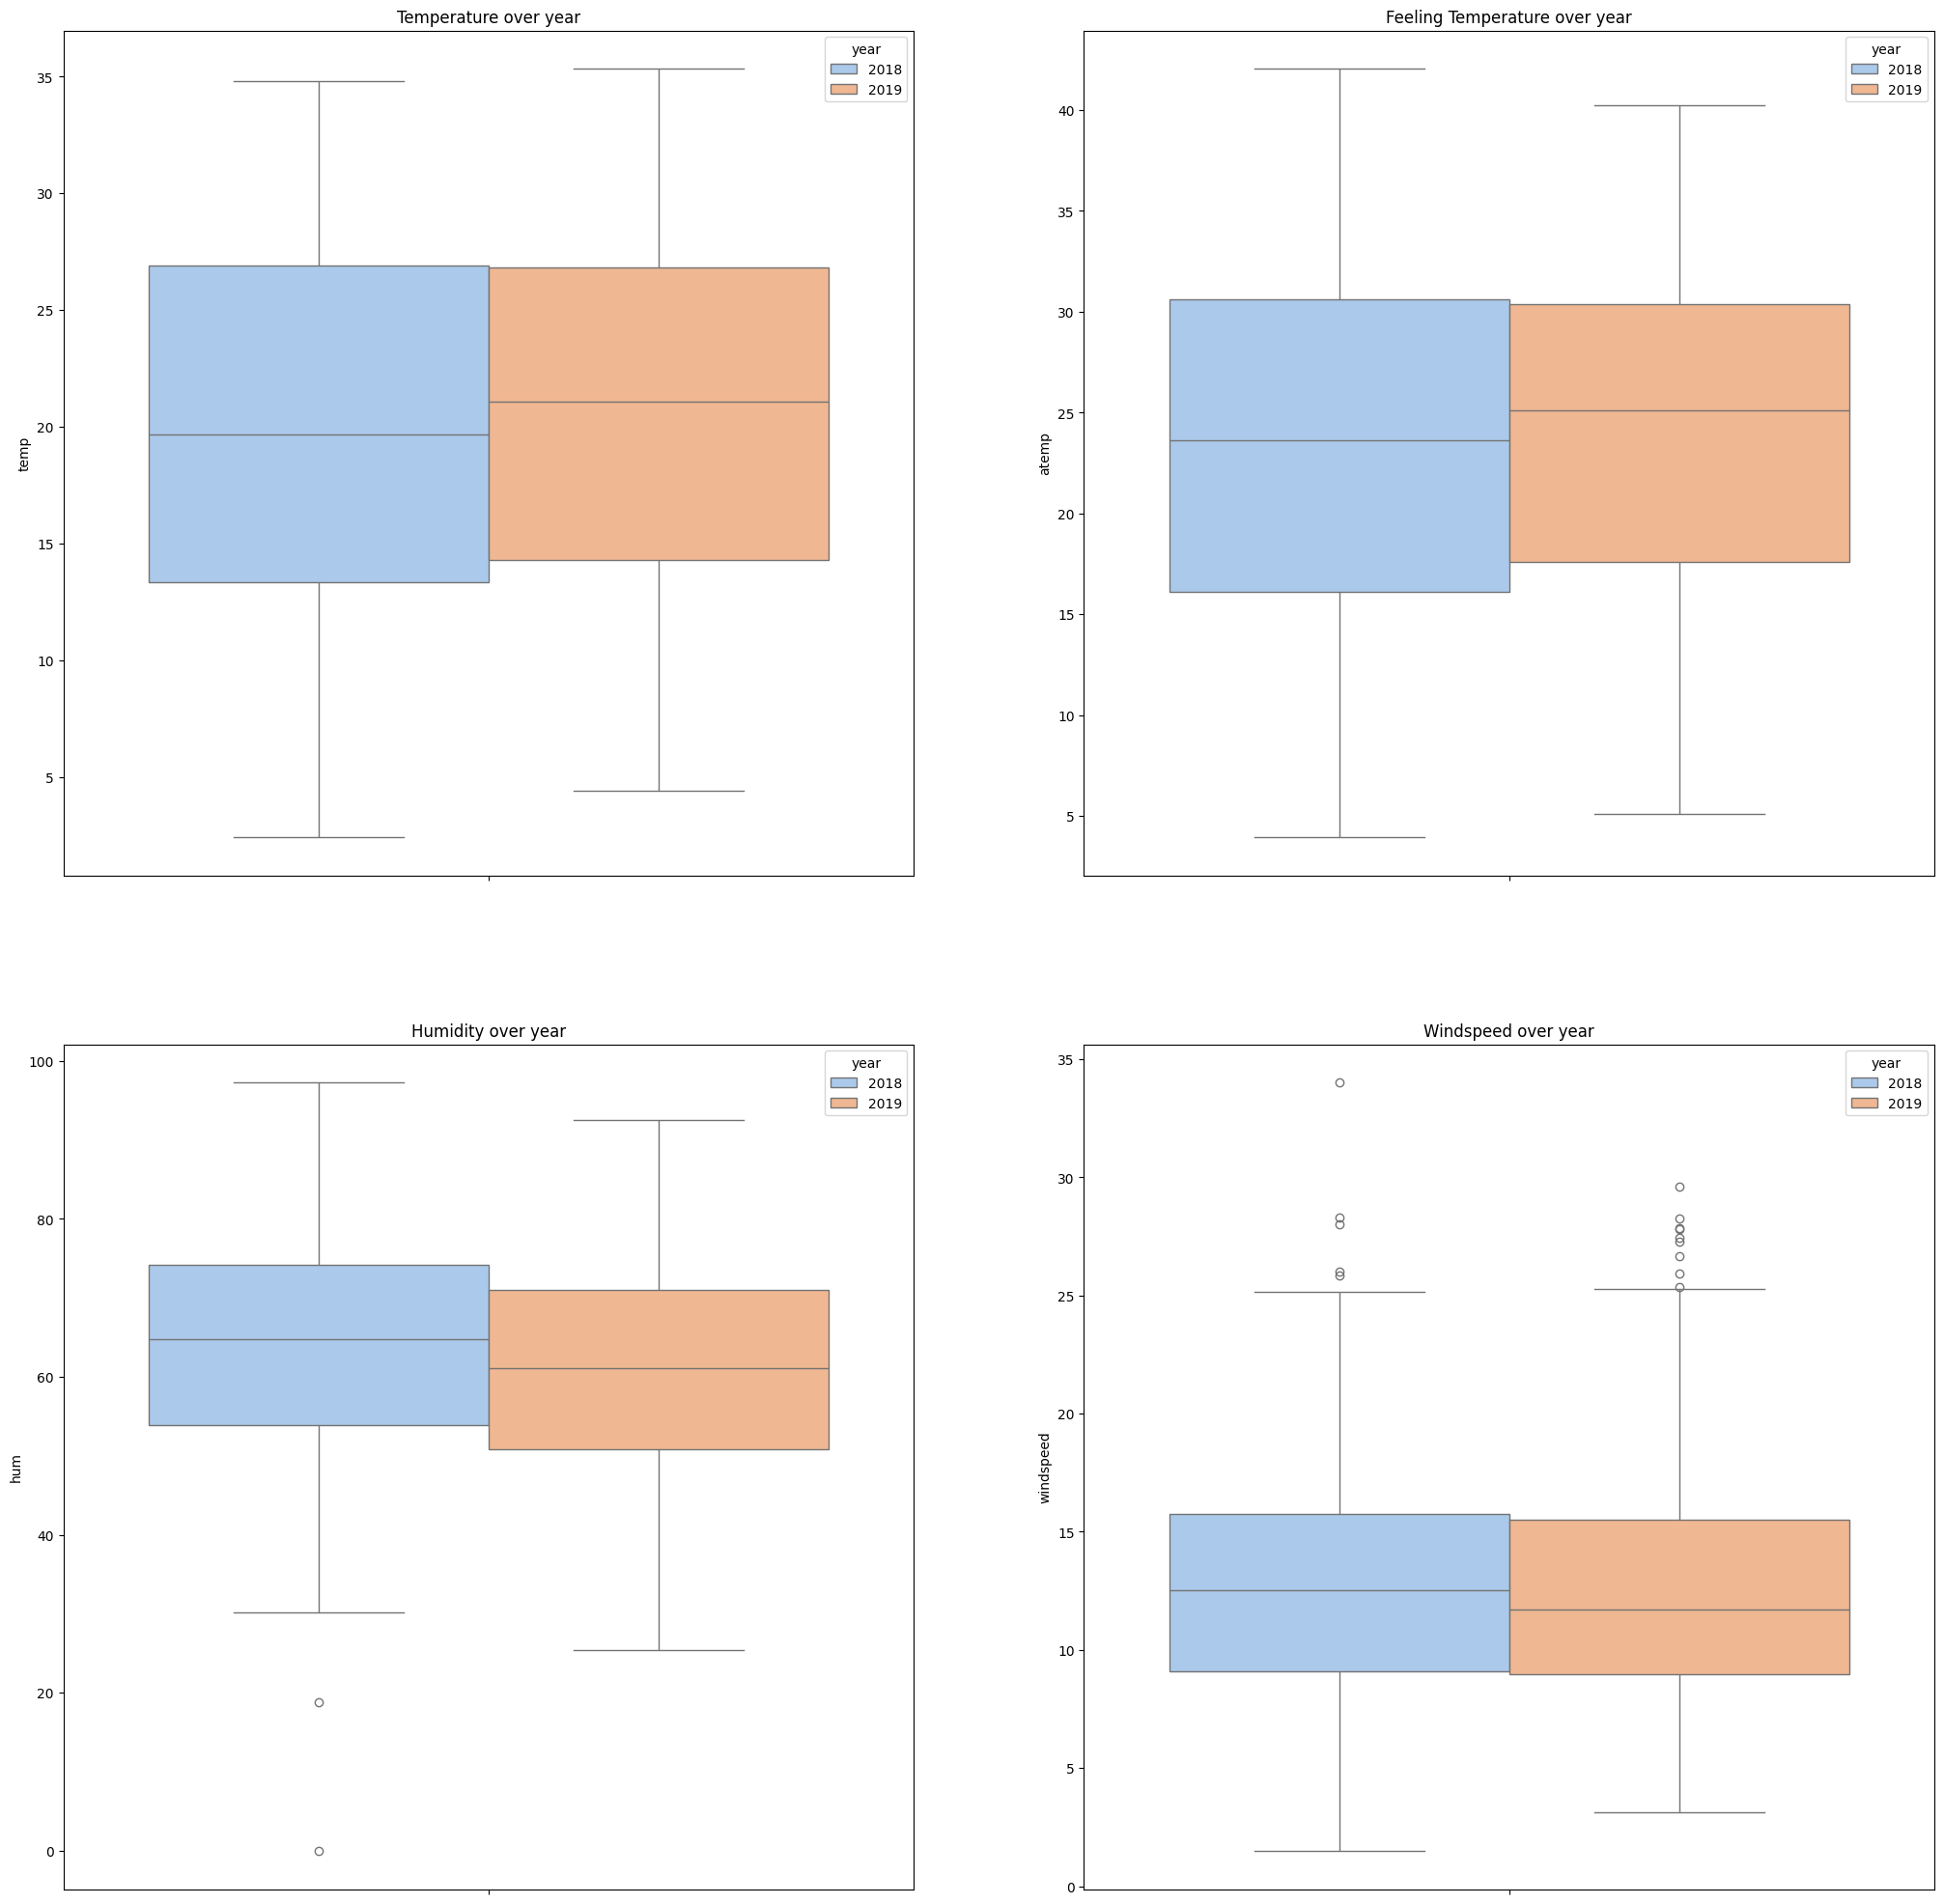

In [47]:
pyplot.figure(figsize=(25,25))

pyplot.subplot(2,2,1)
ax1=sns.boxplot(data,y='temp',hue='year',palette=default_palette)
ax1.set_title("Temperature over year")
pyplot.subplot(2,2,2)
ax2=sns.boxplot(data,y='atemp',hue='year',palette=default_palette)
ax2.set_title("Feeling Temperature over year")
pyplot.subplot(2,2,3)
ax3=sns.boxplot(data,y='hum',hue='year',palette=default_palette)
ax3.set_title("Humidity over year")
pyplot.subplot(2,2,4)
ax4=sns.boxplot(data,y='windspeed',hue='year',palette=default_palette)
ax4.set_title("Windspeed over year")
pyplot.show()

#### Analysing Linear Relationships of Independent Variable with Target Variable

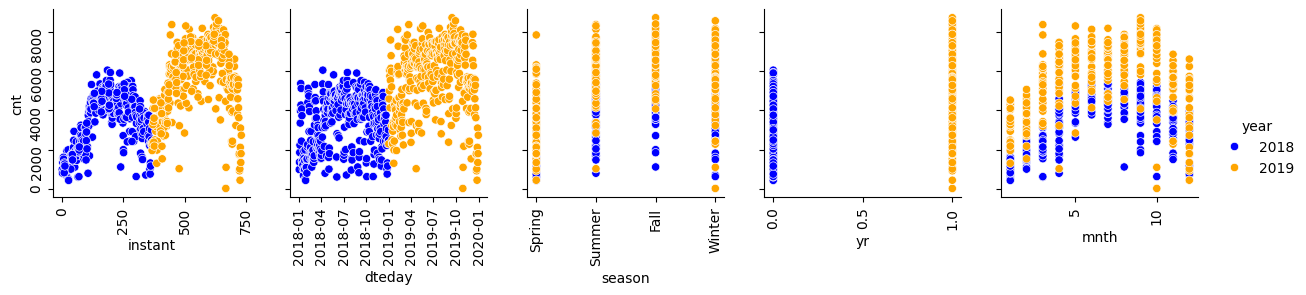

In [48]:
fig=sns.pairplot(data,x_vars=data.columns[:5],y_vars='cnt',palette='blend:blue,orange',hue='year')
for ax in fig.axes.flatten():
    ax.tick_params(rotation=90)
pyplot.show()

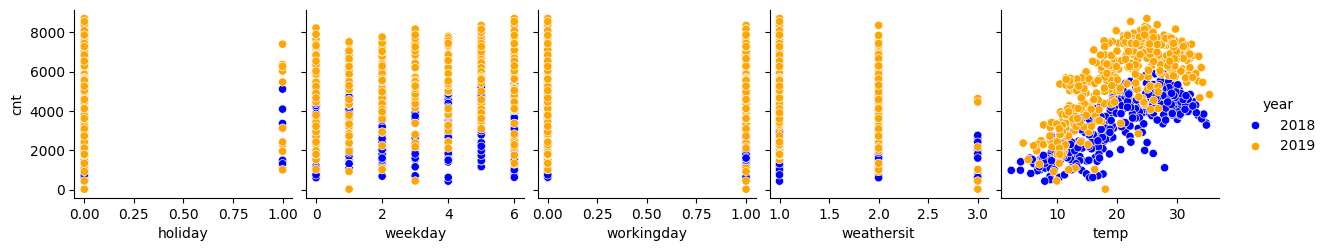

In [49]:
sns.pairplot(data,x_vars=data.columns[5:10],y_vars='cnt',palette='blend:blue,orange',hue='year')
pyplot.show()

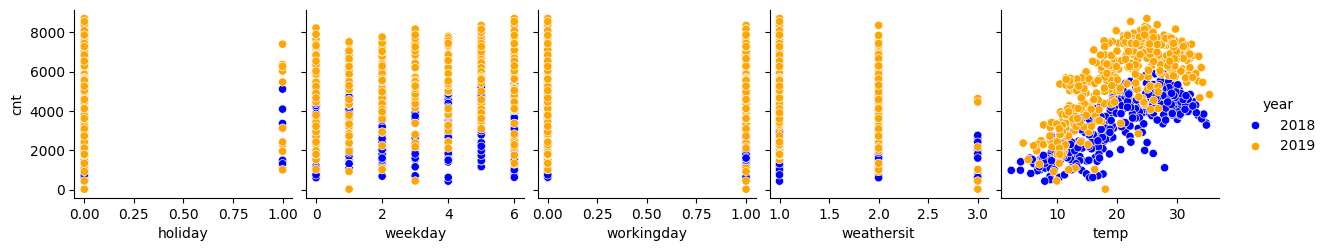

In [50]:
sns.pairplot(data,x_vars=data.columns[5:10],y_vars='cnt',palette='blend:blue,orange',hue='year')
pyplot.show()

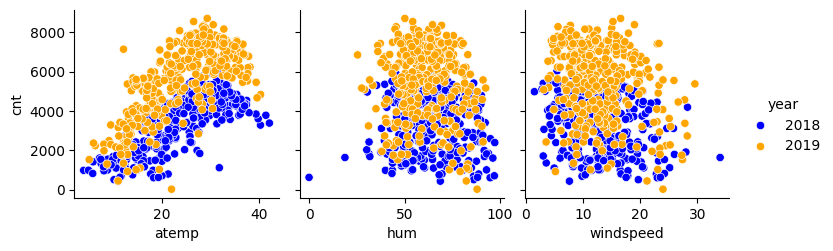

In [51]:
sns.pairplot(data,x_vars=data.columns[10:13],y_vars='cnt',palette='blend:blue,orange',hue='year')
pyplot.show()

<Figure size 2500x1600 with 0 Axes>

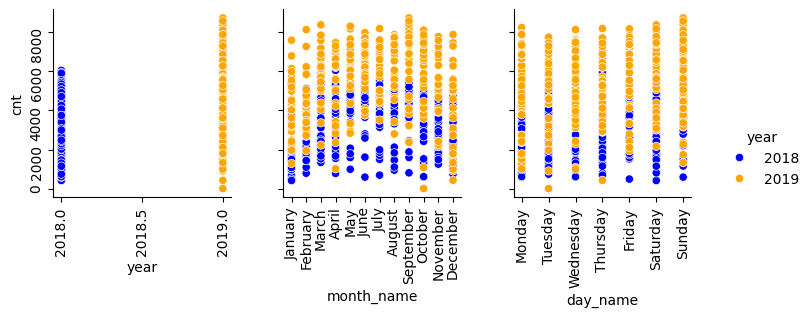

In [52]:
pyplot.figure(figsize=(25,16))
plot_=data[data.columns[15:20]]
plot_.drop(columns=['cnt','diff_in_days'],inplace=True)
fig=sns.pairplot(data,x_vars=plot_.columns,y_vars='cnt',palette='blend:blue,orange',hue='year')
for ax in fig.axes.flatten():
    ax.tick_params(rotation=90)
pyplot.show()

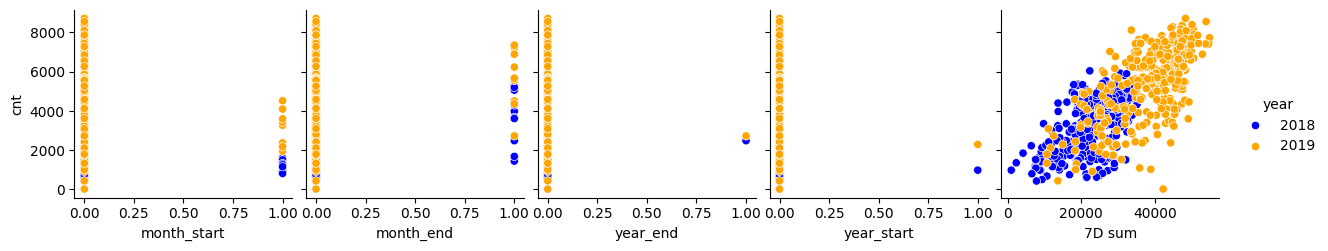

In [53]:
sns.pairplot(data,x_vars=data.columns[20:25],y_vars='cnt',palette='blend:blue,orange',hue='year')
pyplot.show()

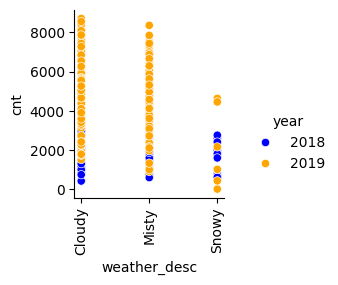

In [54]:
plot_=data[data.columns[25:30]]
plot_.drop(columns='bins',inplace=True)
sns.pairplot(data,x_vars=plot_.columns,y_vars='cnt',palette='blend:blue,orange',hue='year')
pyplot.xticks(rotation=90)
pyplot.show()

#### Pearson R Coefficients

In [55]:
def pearson_r(data_, cols_):
    pear_r=pd.DataFrame({"features":[],"Pearson R":[]})
    pear_r["Pearson R"]=[stats.pearsonr(data_[i],data_['cnt']).statistic for i in cols_]
    pear_r["features"]=lr_col
    return pear_r.sort_values(by='Pearson R',ascending=False)

In [56]:
data_=data.copy()
data_['season']=data_['season'].map({"Spring":1,"Fall":3,"Summer":2,"Winter":4})
lr_col=['atemp','temp','hum','windspeed','weathersit','mnth','workingday','holiday','weekday','yr','season']
pearson_r(data_,lr_col)

,features,Pearson R
0,atemp,0.630685
1,temp,0.627044
9,yr,0.569728
10,season,0.404584
5,mnth,0.278191
8,weekday,0.067534
6,workingday,0.062542
7,holiday,-0.068764
2,hum,-0.098543
3,windspeed,-0.235132


#### Inference
<font color='brown'> 
    <h5>We can observe the Linear upward trend in below columns</h5>
       <ul>
           1. Season<br/>
           2. Year<br/>
           3. Mnth<br/>
           4. Weekday<br/>
           5. atemp<br/>
           6. temp<br/>
        </ul>
    <h5>We can observe the Linear downward trend in below columns</h5>
           <ul>               
           7. hum  <br/>
           8. windspeed<br/>
           </ul>    
    <h5>'Weathersit','workingday' and 'holiday' does not show a trend as such. but there is a difference in their spread based on the values</h5>
</font>

#### Creating Dummies

In [57]:
dummy_seasons=pd.get_dummies(data['season'],dtype=int,drop_first=True)

In [58]:
dummy_weather=pd.get_dummies(data['weather_desc'],dtype=int)
dummy_weather.drop(columns='Snowy',inplace=True)

In [59]:
dummy_months=pd.get_dummies(data['month_name'],dtype='int')
dummy_months.drop(columns='January',inplace=True)

In [60]:
dummy_days=pd.get_dummies(data['day_name'],dtype='int')
dummy_days.drop(columns='Sunday',inplace=True)

In [61]:
engineered_data=data.drop(columns=['dteday','instant','mnth','season','year','weekday','month_name','day_name','weathersit','bins','diff_in_days','weather_desc','7D sum','temp'])

In [62]:
engineered_data=pd.concat([engineered_data,dummy_seasons,dummy_weather,dummy_months,dummy_days],axis=1)

In [63]:
engineered_data.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'month_start', 'month_end', 'year_end',
       'year_start', 'Summer', 'Fall', 'Winter', 'Cloudy', 'Misty', 'April',
       'August', 'December', 'February', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Friday', 'Monday', 'Saturday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [64]:
engineered_data=engineered_data.reindex(['yr','year_end', 'year_start','February','March','April','May',
        'June', 'July','August',
       'September','October','November','December','month_start',
       'month_end', 'Monday','Tuesday', 'Wednesday','Thursday', 'Friday','Saturday',
        'holiday', 'workingday', 'atemp', 'hum', 'windspeed','Cloudy', 'Misty',
       'casual', 'registered', 'cnt','Summer', 'Fall', 'Winter'],axis=1)

In [65]:
engineered_data.year_end=engineered_data.year_end.astype('int')

In [66]:
engineered_data.year_start=engineered_data.year_start.astype('int')

In [67]:
engineered_data.month_start=engineered_data.month_start.astype('int')

In [68]:
engineered_data.month_end=engineered_data.month_start.astype('int')

In [69]:
engineered_data.head()

,yr,year_end,year_start,February,March,April,May,June,July,August,...,hum,windspeed,Cloudy,Misty,casual,registered,cnt,Summer,Fall,Winter
0,0,0,1,0,0,0,0,0,0,0,...,80.5833,10.749882,0,1,331,654,985,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,82.9565,3.565271,0,1,47,1313,1360,0,0,0
59,0,0,0,0,0,0,0,0,0,0,...,53.5000,14.500475,1,0,137,1714,1851,0,0,0
90,0,0,0,0,0,0,0,0,0,0,...,68.6250,17.333436,0,1,307,1920,2227,1,0,0
120,0,0,0,0,0,0,0,0,0,0,...,76.2083,7.125718,0,1,1138,2213,3351,1,0,0


#### Feature Scaling

In [70]:
scaler=MinMaxScaler()

In [71]:
y=pd.DataFrame(engineered_data.pop('cnt'))

In [72]:
X=engineered_data

In [73]:
X.shape,y.shape

((730, 34), (730, 1))

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [75]:
X_train

,yr,year_end,year_start,February,March,April,May,June,July,August,...,atemp,hum,windspeed,Cloudy,Misty,casual,registered,Summer,Fall,Winter
424,1,0,0,0,0,0,0,0,0,0,...,23.76855,61.5417,15.208129,1,0,325,4665,0,0,0
678,1,0,0,0,0,0,0,0,0,0,...,19.69685,64.5417,3.875669,1,0,2090,4446,0,0,1
44,0,0,0,1,0,0,0,0,0,0,...,19.91750,37.5833,27.999836,1,0,208,1705,0,0,0
557,1,0,0,0,0,0,0,0,0,0,...,32.73415,52.9583,9.833925,1,0,1032,6414,0,1,0
379,1,0,0,0,0,0,0,0,0,0,...,8.08125,41.9167,16.834286,1,0,284,2027,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,1,0,0,0,0,0,0,0,0,1,...,13.32105,72.2917,8.959307,0,1,109,2693,0,0,0
53,0,0,0,1,0,0,0,0,0,0,...,12.28585,42.3043,6.305571,1,0,139,1778,0,0,0
350,0,0,0,0,0,0,0,0,0,0,...,12.46855,56.0833,16.292189,0,1,275,2464,0,0,1
79,0,0,0,0,1,0,0,0,0,0,...,20.48675,73.7391,19.348461,0,1,401,1676,1,0,0


In [76]:
columns_to_scale=['atemp','hum','windspeed','casual','registered']

In [77]:
X_train[columns_to_scale]=scaler.fit_transform(X_train[columns_to_scale])

In [78]:
pd.set_option('display.max_columns',None)

In [79]:
X_train

,yr,year_end,year_start,February,March,April,May,June,July,August,September,October,November,December,month_start,month_end,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,holiday,workingday,atemp,hum,windspeed,Cloudy,Misty,casual,registered,Summer,Fall,Winter
424,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.520199,0.634178,0.421784,1,0,0.098446,0.670661,0,0,0
678,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.413306,0.665092,0.073090,1,0,0.636391,0.639041,0,0,1
44,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.419099,0.387290,0.815378,1,0,0.062786,0.243286,0,0,0
557,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.755570,0.545727,0.256423,1,0,0.313929,0.923188,0,1,0
379,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.108365,0.431945,0.471820,1,0,0.085949,0.289778,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.245924,0.744955,0.229511,0,1,0.032612,0.385937,0,0,0
53,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.218747,0.435939,0.147857,1,0,0.041756,0.253826,0,0,0
350,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.223544,0.577930,0.455140,0,1,0.083206,0.352873,0,0,1
79,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.434043,0.759870,0.549180,0,1,0.121609,0.239099,1,0,0


In [80]:
y_train

,cnt
424,4990
678,6536
44,1913
557,7446
379,2311
...,...
403,2802
53,1917
350,2739
79,2077


#### Feature Selection

In [81]:
rfe=RFE(estimator=LinearRegression(),n_features_to_select=25, step=1)

In [82]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=25)

In [83]:
rfe.ranking_

array([ 1,  1,  9,  1,  7,  3,  5,  1,  1,  1,  1, 10,  1,  1,  1,  1,  6,
        1,  1,  1,  1,  1,  4,  2,  8,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [84]:
X_train.columns[rfe.support_]

Index(['yr', 'year_end', 'February', 'June', 'July', 'August', 'September',
       'November', 'December', 'month_start', 'month_end', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'hum', 'windspeed',
       'Cloudy', 'Misty', 'casual', 'registered', 'Summer', 'Fall', 'Winter'],
      dtype='object')

#### Defining Variance Inflation Factor

In [85]:
def vif(X,col):
    vif=pd.DataFrame({'vif':[],'col':[]})
    vif['vif']=[variance_inflation_factor(X,i) for i in range(X[col].shape[1])]
    vif['col']=col
    return vif

#### Creating a Model

In [86]:
def create_model(X_,y_,X_col):
    X_sm=sm.add_constant(X_[X_col])
    model_=sm.OLS(y_,X_sm)
    result_=model_.fit()
    return X_sm,y_,result_

#### Model 1 : 
##### Starting with a single variable Feeling Temperature

In [87]:
X_train_sm,y_train,model1=create_model(X_train,y_train,['atemp'])

In [88]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     432.1
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           3.36e-72
Time:                        12:12:52   Log-Likelihood:                -5094.5
No. Observations:                 584   AIC:                         1.019e+04
Df Residuals:                     582   BIC:                         1.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1422.6387    159.971      8.893      0.000    1108.448    1736.830
atemp       6037.0345    290.423     20.787      0.000    5466.630    6607.439
==============================================================================
Omnibus:                        6.282   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.684
Skew:                           0.096   Prob(JB):                       0.0962
Kurtosis:                       2.605   Cond. No.                         5.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inference
<font color=brown>1. Feeling Temperature seems to be explaining the model quite well with R2 value of 42%</font>

#### Model 2 :  
##### Adding humidity to the existing model

In [89]:
X_train_sm,y_train,model2=create_model(X_train,y_train,X_col=['atemp','hum'])

In [90]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     239.4
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           1.44e-76
Time:                        12:12:52   Log-Likelihood:                -5081.1
No. Observations:                 584   AIC:                         1.017e+04
Df Residuals:                     581   BIC:                         1.018e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2700.7969    290.554      9.295      0.000    2130.132    3271.461
atemp       6261.4744    287.319     21.793      0.000    5697.163    6825.785
hum        -2164.8000    414.645     -5.221      0.000   -2979.185   -1350.415
==============================================================================
Omnibus:                        3.429   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                2.987
Skew:                           0.091   Prob(JB):                        0.225
Kurtosis:                       2.701   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Inference
<font color='brown'>
    <p>
1. There is a significant jump in the R2 value post addition of humidity 
    </p>
    <p>
2. The variable humidity negatively explains the variable count
    </p>
</font>

#### Model 3 :
##### Adding Windspeed to the model

In [91]:
X_train_sm,y_train,model3=create_model(X_train,y_train,X_col=['atemp','hum','windspeed'])

In [92]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     178.2
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           7.36e-82
Time:                        12:12:52   Log-Likelihood:                -5065.9
No. Observations:                 584   AIC:                         1.014e+04
Df Residuals:                     580   BIC:                         1.016e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3971.0353    363.881     10.913      0.000    3256.351    4685.720
atemp       5995.7023    284.231     21.095      0.000    5437.456    6553.949
hum        -2767.2401    418.600     -6.611      0.000   -3589.397   -1945.084
windspeed  -2148.9466    386.251     -5.564      0.000   -2907.568   -1390.325
==============================================================================
Omnibus:                        3.857   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                3.374
Skew:                           0.108   Prob(JB):                        0.185
Kurtosis:                       2.696   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Inference
<font color='brown'>1. There is a significant jump in the R2 value post addition of windspeed </font><br/>
<font color='brown'>2. The variable windspeed negatively explains the variable count</font>

#### Model 4:
##### Adding workingday to the model

In [93]:
X_train_sm,y_train,model4=create_model(X_train,y_train,X_col=['atemp','hum','windspeed','workingday'])

In [94]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     134.8
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           2.43e-81
Time:                        12:12:52   Log-Likelihood:                -5064.4
No. Observations:                 584   AIC:                         1.014e+04
Df Residuals:                     579   BIC:                         1.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3849.9458    369.978     10.406      0.000    3123.284    4576.608
atemp       5965.3109    284.293     20.983      0.000    5406.939    6523.683
hum        -2785.3085    418.019     -6.663      0.000   -3606.327   -1964.290
windspeed  -2145.1392    385.601     -5.563      0.000   -2902.486   -1387.792
workingday   217.0893    125.804      1.726      0.085     -29.999     464.177
==============================================================================
Omnibus:                        2.979   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.807
Skew:                           0.112   Prob(JB):                        0.246
Kurtosis:                       2.744   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Inference
<font color='brown'>
<p>1. There is a not much significance with variable workingday as the p-value is high</p>
<p>2. No significant increase in R2 as well.</p>
</font>

#### Model 5 : 
##### Adding yr to the model, Dropping workingday

In [95]:
X_train_sm,y_train,model5=create_model(X_train,y_train,X_col=['atemp','hum','windspeed','yr'])

In [96]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     400.3
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          4.33e-165
Time:                        12:12:52   Log-Likelihood:                -4869.5
No. Observations:                 584   AIC:                             9749.
Df Residuals:                     579   BIC:                             9771.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2603.6298    266.562      9.767      0.000    2080.083    3127.176
atemp       5662.2340    203.715     27.795      0.000    5262.124    6062.344
hum        -2048.2913    300.847     -6.808      0.000   -2639.175   -1457.408
windspeed  -2008.0768    276.232     -7.270      0.000   -2550.615   -1465.538
yr          1996.3370     84.698     23.570      0.000    1829.985    2162.689
==============================================================================
Omnibus:                       32.671   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.617
Skew:                          -0.481   Prob(JB):                     3.38e-10
Kurtosis:                       3.931   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inference : 
<font color='brown'>1. There is a huge jump on R2 value on adding year</font><br/>
<font color='brown'>2. Windspeed and Humidity explains the coefficients negatively</font>

#### Model 6 : Adding Weather to the model

In [97]:
X_train_sm,y_train,model6=create_model(X_train,y_train,X_col=['atemp','hum','windspeed','yr','Cloudy','Misty'])

In [98]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     296.8
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.06e-172
Time:                        12:12:53   Log-Likelihood:                -4845.6
No. Observations:                 584   AIC:                             9705.
Df Residuals:                     577   BIC:                             9736.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8728    451.193      0.037      0.970    -869.308     903.054
atemp       5403.4086    201.321     26.840      0.000    5007.997    5798.820
hum         -635.4084    373.218     -1.703      0.089   -1368.439      97.622
windspeed  -1571.5527    272.835     -5.760      0.000   -2107.424   -1035.681
yr          1997.9116     81.622     24.477      0.000    1837.598    2158.225
Cloudy      1856.8127    277.270      6.697      0.000    1312.231    2401.394
Misty       1408.3364    261.985      5.376      0.000     893.775    1922.898
==============================================================================
Omnibus:                       22.931   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.878
Skew:                          -0.400   Prob(JB):                     8.84e-07
Kurtosis:                       3.710   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inference : 
<font color='brown'>
1. There is a siginificant improvement in the R2 value post addition of weather.
</font> <br/>
<font color='brown'>
2. Both Cloudy, Misty weather explains the count variable positively
</font></br>
<font color='brown'>
3. hum has higher p-value , hence insignificant
</font>


#### Model 7 : Adding Months 

In [99]:
X_train_sm,y_train,model7=create_model(X_train,y_train,X_col=['atemp','yr','Cloudy','hum','Misty','windspeed','September','October','March','June'])

In [100]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     195.6
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.85e-177
Time:                        12:12:53   Log-Likelihood:                -4823.1
No. Observations:                 584   AIC:                             9668.
Df Residuals:                     573   BIC:                             9716.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -188.1511    439.185     -0.428      0.669   -1050.759     674.457
atemp       5351.1155    198.718     26.928      0.000    4960.810    5741.421
yr          2005.0766     78.847     25.430      0.000    1850.211    2159.942
Cloudy      1913.6222    268.716      7.121      0.000    1385.834    2441.411
hum         -650.5187    362.476     -1.795      0.073   -1362.462      61.424
Misty       1441.5864    254.333      5.668      0.000     942.048    1941.125
windspeed  -1487.8417    263.787     -5.640      0.000   -2005.949    -969.734
September    735.9955    146.929      5.009      0.000     447.410    1024.581
October      689.6000    137.622      5.011      0.000     419.294     959.906
March        275.6291    138.787      1.986      0.048       3.035     548.223
June         169.7076    152.141      1.115      0.265    -129.114     468.529
==============================================================================
Omnibus:                       30.733   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.429
Skew:                          -0.464   Prob(JB):                     1.66e-09
Kurtosis:                       3.894   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inference : 
<font color='brown'>1. There is a siginificant improvement in the R2 value post addition of Months.</font><br/>
<font color='brown'>2. September,October,March,June explains the count variable positively</font><br/>
<font color='brown'>3. hum and June p-value are insignificant</font>

#### Model 8 : 
##### Adding Seasons to the model

In [101]:
X_train_sm,y_train,model8=create_model(X_train,y_train,X_col=['atemp','yr','Cloudy','Misty','hum','windspeed','September','October','March','June','Summer','Winter','Fall'])

In [102]:
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     215.8
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          2.94e-210
Time:                        12:12:53   Log-Likelihood:                -4737.3
No. Observations:                 584   AIC:                             9503.
Df Residuals:                     570   BIC:                             9564.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -230.6950    380.524     -0.606      0.545    -978.095     516.705
atemp       4493.9157    286.960     15.660      0.000    3930.287    5057.545
yr          1985.8975     68.500     28.991      0.000    1851.354    2120.442
Cloudy      1976.5435    233.776      8.455      0.000    1517.376    2435.711
Misty       1530.1744    221.289      6.915      0.000    1095.532    1964.816
hum        -1215.4181    319.816     -3.800      0.000   -1843.579    -587.257
windspeed  -1436.3832    230.407     -6.234      0.000   -1888.933    -983.833
September    616.5887    128.679      4.792      0.000     363.845     869.332
October      266.8925    128.092      2.084      0.038      15.302     518.483
March        269.7580    121.699      2.217      0.027      30.724     508.792
June         140.0785    132.024      1.061      0.289    -119.235     399.392
Summer      1113.7641    124.695      8.932      0.000     868.846    1358.682
Winter      1411.1878    110.842     12.732      0.000    1193.480    1628.896
Fall         782.5622    162.485      4.816      0.000     463.420    1101.704
==============================================================================
Omnibus:                      103.589   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.843
Skew:                          -0.874   Prob(JB):                     8.51e-63
Kurtosis:                       5.948   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inference : 
<font color='brown'>
1. There is a siginificant improvement in the R2 value post addition of Seasons.
</font><br/>
<font color='brown'>    
2. T2 R2 Value Jumped to 83.1%
</font><br/>
<font color='brown'>
3. However the month June proves to have lesser significance because of high p-value
</font><br/>

#### Model 9 :
##### Adding holiday, Saturday to the model 

In [103]:
X_train_sm,y_train,model9=create_model(X_train,y_train,['atemp','yr','hum','Cloudy','Misty','windspeed','September','March','October','June','Summer','Winter','Fall','holiday','Saturday'])

In [104]:
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     192.1
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          5.05e-211
Time:                        12:12:53   Log-Likelihood:                -4729.9
No. Observations:                 584   AIC:                             9492.
Df Residuals:                     568   BIC:                             9562.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -229.1227    376.830     -0.608      0.543    -969.273     511.028
atemp       4477.3550    283.899     15.771      0.000    3919.734    5034.976
yr          1985.3605     67.765     29.298      0.000    1852.259    2118.462
hum        -1244.1783    316.494     -3.931      0.000   -1865.819    -622.538
Cloudy      1998.8244    231.327      8.641      0.000    1544.464    2453.184
Misty       1545.3001    219.033      7.055      0.000    1115.087    1975.513
windspeed  -1428.5089    227.927     -6.267      0.000   -1876.192    -980.826
September    591.9360    127.570      4.640      0.000     341.370     842.502
March        238.2697    120.686      1.974      0.049       1.224     475.316
October      254.9399    126.908      2.009      0.045       5.673     504.207
June         123.5063    130.721      0.945      0.345    -133.249     380.262
Summer      1102.3620    123.486      8.927      0.000     859.816    1344.908
Winter      1419.1481    109.673     12.940      0.000    1203.735    1634.561
Fall         773.0223    160.756      4.809      0.000     457.273    1088.772
holiday     -615.8884    207.286     -2.971      0.003   -1023.030    -208.747
Saturday     257.2638    103.378      2.489      0.013      54.214     460.314
==============================================================================
Omnibus:                       93.228   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.722
Skew:                          -0.820   Prob(JB):                     1.07e-51
Kurtosis:                       5.638   Cond. No.                         26.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inference : 
<font color='brown'>
1. There is a slight improvement in the R2 value post addition of Seasons.</font><br/>
<font color='brown'>
2. T2 R2 Value Jumped to 83.5%</font><br/><font color='brown'></font>
<font color='brown'>
3. However the month June proves to have lesser significance with a slightly greater value</font>


#### Model 10: Removing "June" from the Model 9

In [105]:
X_train_sm,y_train,model10=create_model(X_train,y_train,['atemp','yr','Cloudy','Misty','hum','windspeed','September','March','Summer','Winter','Fall','holiday','Saturday'])
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     220.3
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          2.26e-212
Time:                        12:12:53   Log-Likelihood:                -4732.2
No. Observations:                 584   AIC:                             9492.
Df Residuals:                     570   BIC:                             9554.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -157.3017    376.071     -0.418      0.676    -895.955     581.352
atemp       4558.1756    281.675     16.182      0.000    4004.929    5111.423
yr          1981.1461     67.892     29.181      0.000    1847.796    2114.496
Cloudy      1960.6656    231.173      8.481      0.000    1506.612    2414.720
Misty       1512.1402    218.988      6.905      0.000    1082.019    1942.262
hum        -1298.9841    315.863     -4.112      0.000   -1919.381    -678.588
windspeed  -1437.4578    228.280     -6.297      0.000   -1885.830    -989.085
September    546.0576    125.966      4.335      0.000     298.644     793.471
March        207.0005    119.775      1.728      0.084     -28.253     442.254
Summer      1090.9095    123.346      8.844      0.000     848.641    1333.178
Winter      1470.1215    106.597     13.791      0.000    1260.750    1679.493
Fall         748.9064    160.624      4.662      0.000     433.420    1064.393
holiday     -643.2024    207.336     -3.102      0.002   -1050.438    -235.967
Saturday     252.9004    103.590      2.441      0.015      49.436     456.365
==============================================================================
Omnibus:                       88.759   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.576
Skew:                          -0.793   Prob(JB):                     9.36e-48
Kurtosis:                       5.527   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Variance Inflation Factor : ( Model 10 )

In [106]:
col=['atemp','yr','Cloudy','Misty','hum','windspeed','September','March','Summer','Winter','Fall','holiday','Saturday']

In [107]:
vif(X_train[col],col)

,vif,col
0,21.425139,atemp
1,2.079994,yr
2,10.834363,Cloudy
3,7.644241,Misty
4,17.427395,hum
5,4.934891,windspeed
6,1.137747,September
7,1.151778,March
8,3.343584,Summer
9,2.510397,Winter


#### Inference
<font color='brown'>
1. The model was generated without June and it shows R^2 value of 83.4%</font><br/>
<font color='brown'>
2. However we see the variance inflation factor that has peaked up in the above vif table</font><br/>
<font color='brown'>
3. However became insignification with high p-value</font>

#### Model 11 :Removing "hum" from the Model 10

In [108]:
X_train_sm,y_train,model11=create_model(X_train,y_train,['atemp','yr','Cloudy','Misty','windspeed','September','March','Summer','Winter','Fall','holiday','Saturday'])
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     230.8
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          5.86e-210
Time:                        12:12:53   Log-Likelihood:                -4740.8
No. Observations:                 584   AIC:                             9508.
Df Residuals:                     571   BIC:                             9564.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1303.9976    255.845     -5.097      0.000   -1806.510    -801.486
atemp       4320.2856    279.486     15.458      0.000    3771.340    4869.231
yr          2012.9868     68.383     29.437      0.000    1878.674    2147.299
Cloudy      2352.0504    213.589     11.012      0.000    1932.534    2771.567
Misty       1687.0433    217.791      7.746      0.000    1259.274    2114.812
windspeed  -1150.2505    220.342     -5.220      0.000   -1583.031    -717.470
September    537.1451    127.690      4.207      0.000     286.346     787.944
March        234.6406    121.241      1.935      0.053      -3.491     472.773
Summer      1105.0874    125.004      8.840      0.000     859.563    1350.612
Winter      1428.3640    107.581     13.277      0.000    1217.061    1639.667
Fall         797.9134    162.398      4.913      0.000     478.944    1116.883
holiday     -623.3032    210.148     -2.966      0.003   -1036.060    -210.546
Saturday     251.1212    105.022      2.391      0.017      44.844     457.398
==============================================================================
Omnibus:                       85.020   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.179
Skew:                          -0.779   Prob(JB):                     1.52e-43
Kurtosis:                       5.383   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Variance Inflation Factor : ( Model 11 )

In [109]:
col=['atemp','yr','Cloudy','Misty','windspeed','September','March','Summer','Winter','Fall','holiday','Saturday']

In [110]:
vif(X_train[col],col)

,vif,col
0,18.827728,atemp
1,2.077082,yr
2,8.548263,Cloudy
3,4.622593,Misty
4,4.827222,windspeed
5,1.137733,September
6,1.151615,March
7,3.335495,Summer
8,2.422083,Winter
9,5.540371,Fall


#### Inference
<font color='brown'>
1. The model was generated without hum and it shows R^2 value of 82.6%
</font><br/>
<font color='brown'>
2. However we see the variance inflation factor is still up in atemp,cloudy, misty,Fall variables
</font>

#### Model 12 :  Removing "Fall" from the Model 11

In [111]:
X_train_sm,y_train,model12=create_model(X_train,y_train,['atemp','yr','Cloudy','Misty','windspeed','September','March','Summer','Winter','holiday','Saturday'])
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     239.9
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          4.82e-206
Time:                        12:12:53   Log-Likelihood:                -4752.9
No. Observations:                 584   AIC:                             9530.
Df Residuals:                     572   BIC:                             9582.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1379.9994    260.491     -5.298      0.000   -1891.636    -868.363
atemp       5405.0160    174.814     30.919      0.000    5061.661    5748.371
yr          1993.3985     69.634     28.627      0.000    1856.629    2130.167
Cloudy      2283.2183    217.398     10.502      0.000    1856.223    2710.214
Misty       1620.4749    221.722      7.309      0.000    1184.985    2055.964
windspeed  -1196.8911    224.547     -5.330      0.000   -1637.928    -755.855
September    584.8468    129.870      4.503      0.000     329.766     839.927
March        210.2990    123.566      1.702      0.089     -32.398     452.997
Summer       658.3791     87.509      7.524      0.000     486.501     830.257
Winter      1105.1950     86.837     12.727      0.000     934.637    1275.753
holiday     -636.7186    214.339     -2.971      0.003   -1057.705    -215.732
Saturday     253.3337    107.125      2.365      0.018      42.928     463.739
==============================================================================
Omnibus:                       66.218   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.896
Skew:                          -0.615   Prob(JB):                     2.32e-34
Kurtosis:                       5.203   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
col=['atemp','yr','Cloudy','Misty','windspeed','September','March','Summer','Winter','holiday','Saturday']
vif(X_train[col],col)

,vif,col
0,6.521368,atemp
1,2.069166,yr
2,8.213131,Cloudy
3,4.452439,Misty
4,4.795548,windspeed
5,1.131017,September
6,1.149274,March
7,1.573678,Summer
8,1.456031,Winter
9,1.048864,holiday


#### Model 13: Removing "Misty","March" from Model 12

In [113]:
X_train_sm,y_train,model13=create_model(X_train,y_train,['atemp','yr','Cloudy','windspeed','September','Summer','Winter','holiday','Saturday'])
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     261.9
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          9.52e-197
Time:                        12:12:53   Log-Likelihood:                -4780.5
No. Observations:                 584   AIC:                             9581.
Df Residuals:                     574   BIC:                             9625.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        222.0781    154.226      1.440      0.150     -80.837     524.994
atemp       5348.4751    182.025     29.383      0.000    4990.959    5705.991
yr          2024.1752     72.708     27.840      0.000    1881.368    2166.982
Cloudy       785.4817     76.787     10.229      0.000     634.664     936.299
windspeed  -1413.3027    233.041     -6.065      0.000   -1871.020    -955.586
September    634.8840    135.233      4.695      0.000     369.272     900.495
Summer       706.0531     90.784      7.777      0.000     527.745     884.362
Winter      1039.8724     90.305     11.515      0.000     862.504    1217.241
holiday     -589.4589    223.793     -2.634      0.009   -1029.012    -149.906
Saturday     268.7886    112.051      2.399      0.017      48.708     488.869
==============================================================================
Omnibus:                       93.221   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.049
Skew:                          -0.776   Prob(JB):                     6.22e-59
Kurtosis:                       5.934   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Variance Inflation Factor - Model 13

In [114]:
col=['atemp','yr','Cloudy','windspeed','September','Summer','Winter','holiday','Saturday']

In [115]:
vif(X_train[col],col)

,vif,col
0,4.326715,atemp
1,1.988645,yr
2,2.686437,Cloudy
3,3.487677,windspeed
4,1.115058,September
5,1.533734,Summer
6,1.376534,Winter
7,1.037917,holiday
8,1.129042,Saturday


#### Inference : 
<font color='brown'>
1. There is a decrease in R^2 value.<br/>
2. R^2 value has fallen to .805 and Adjusted R2 to .802<br/>
3. VIF is within the prescribed limit of 5<br/>
4. Probability of F-statistic is very less.    
</font>

In [116]:
y_pred_train_model13=model13.predict(X_train_sm)

In [117]:
model13.resid

424   -227.898507
678    357.134819
44    -183.722980
557    466.730320
379   -633.498755
          ...    
403   -435.202925
53     -51.556828
350    924.682650
79    -396.442122
490    494.836622
Length: 584, dtype: float64

In [118]:
# A case of vif infinity
#col=['casual','registered','cnt']
#vif(data[col],col)

#### Model Fitness Assesment

In [119]:
X_test[columns_to_scale]=scaler.transform(X_test[columns_to_scale])

In [120]:
X_test[columns_to_scale].describe()

,atemp,hum,windspeed,casual,registered
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.562290,0.661425,0.341080,0.274123,0.527550
std,0.215415,0.144370,0.155598,0.222686,0.204102
min,0.025950,0.298841,0.047441,0.009753,0.065261
25%,0.383669,0.555603,0.226285,0.106141,0.398823
50%,0.584042,0.654358,0.325643,0.223255,0.524040
75%,0.754319,0.765671,0.439977,0.354160,0.665463
max,0.980934,1.002146,0.725649,1.038708,0.969679


#### Model Predictions

In [121]:
X_test_sm=sm.add_constant(X_test[['atemp','yr','Cloudy','windspeed','September','Summer','Winter','holiday','Saturday']])

In [122]:
y_pred_test_model13=model13.predict(X_test_sm)
y_pred_test_model13

96     3795.629989
535    7977.984399
299    3673.397164
280    5028.531968
36     2421.029144
          ...     
219    4895.229481
719    3052.949207
90     1674.500734
392    4218.963828
360    1483.314127
Length: 146, dtype: float64

#### Residual Analysis

##### Error Analysis in training set 

In [123]:
error = pd.DataFrame({"y_pred_train_model13":[],"y_train":[]})
error['y_train'] = y_train['cnt']
error['y_pred_train_model13'] = y_pred_train_model13
error['error_model13']= y_pred_train_model13-y_train['cnt']
error

,y_pred_train_model13,y_train,error_model13
424,5217.898507,4990,227.898507
678,6178.865181,6536,-357.134819
44,2096.722980,1913,183.722980
557,6979.269680,7446,-466.730320
379,2944.498755,2311,633.498755
...,...,...,...
403,3237.202925,2802,435.202925
53,1968.556828,1917,51.556828
350,1814.317350,2739,-924.682650
79,2473.442122,2077,396.442122


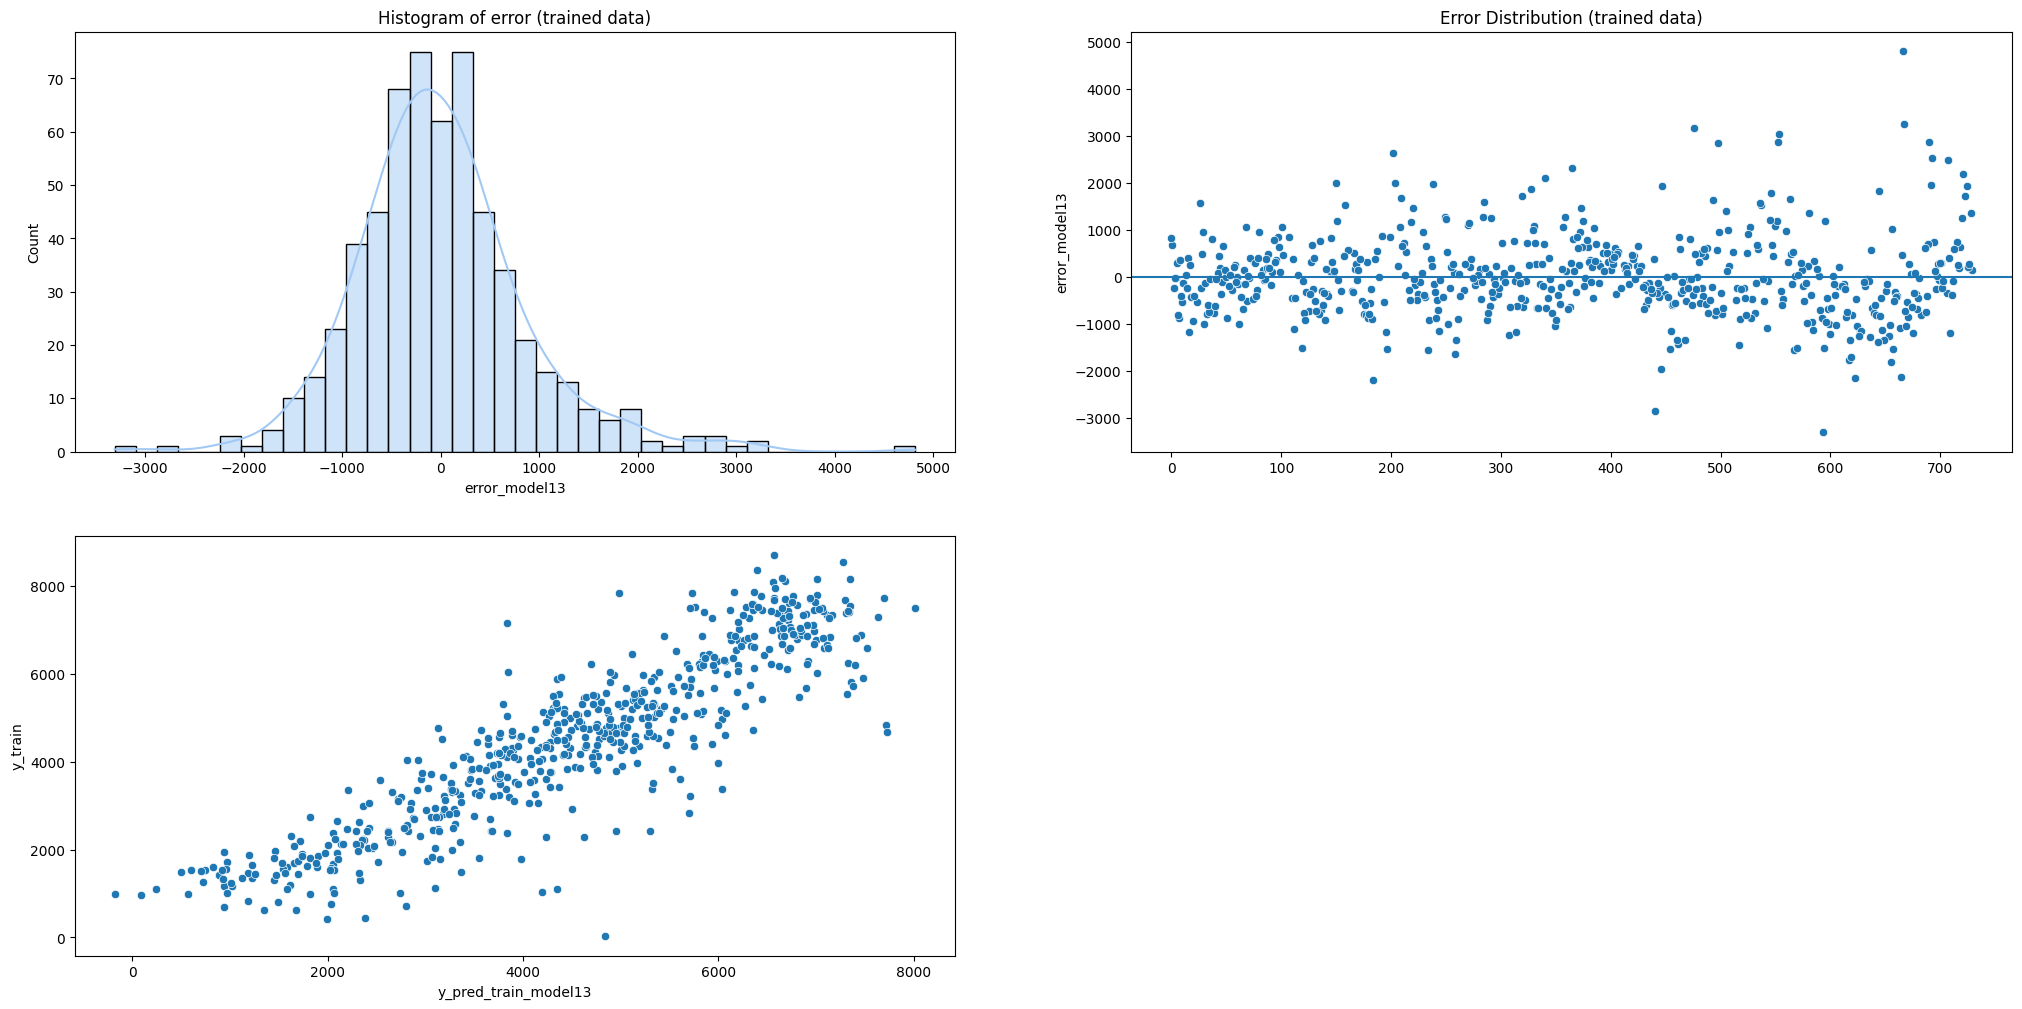

In [124]:
pyplot.figure(figsize=(25,12))
pyplot.subplot(2,2,1)
ax=sns.histplot(error["error_model13"],kde=True,color=default_palette[0])
ax.set_title("Histogram of error (trained data)")
pyplot.subplot(2,2,2)
ax1=sns.scatterplot(error['error_model13'])
ax1.set_title("Error Distribution (trained data)")
ax1.axhline(y=0)
pyplot.subplot(2,2,3)
sns.scatterplot(error,x='y_pred_train_model13',y='y_train')
pyplot.show()

##### Error Analysis in testing set 

In [125]:
error = pd.DataFrame({"y_pred_test_model13":[],"y_test":[]})
error['y_test'] = y_test['cnt']
error['y_pred_test_model13'] = y_pred_test_model13
error['error_model13']= y_pred_test_model13-y_test['cnt']
error

,y_pred_test_model13,y_test,error_model13
96,3795.629989,3141,654.629989
535,7977.984399,6211,1766.984399
299,3673.397164,2659,1014.397164
280,5028.531968,5409,-380.468032
36,2421.029144,1623,798.029144
...,...,...,...
219,4895.229481,4326,569.229481
719,3052.949207,3623,-570.050793
90,1674.500734,2227,-552.499266
392,4218.963828,4023,195.963828


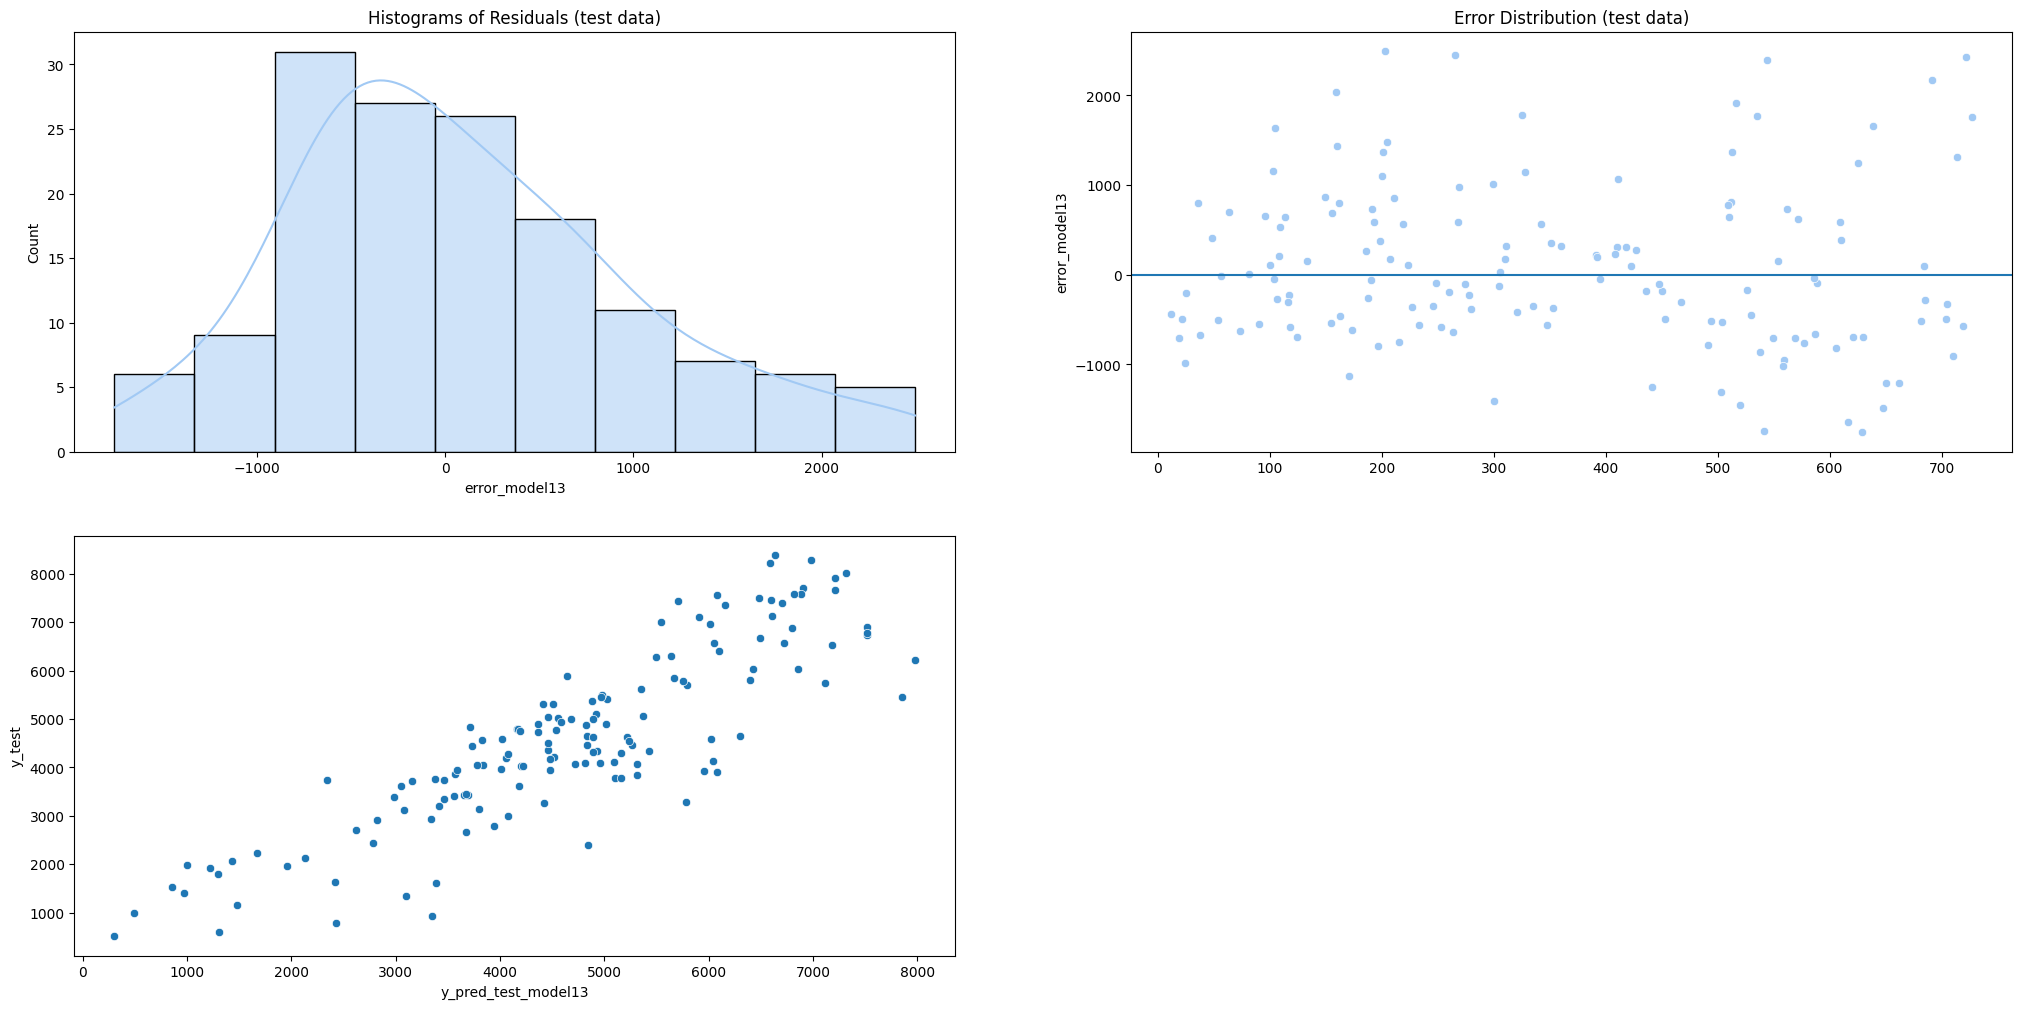

In [126]:
pyplot.figure(figsize=(25,12))
pyplot.subplot(2,2,1)
ax1=sns.histplot(error["error_model13"],kde=True,color=default_palette[0])
ax1.set_title("Histograms of Residuals (test data)")
pyplot.subplot(2,2,2)
ax2=sns.scatterplot(error['error_model13'],color=default_palette[0])
ax2.axhline(y=0)
ax2.set_title("Error Distribution (test data)")
pyplot.subplot(2,2,3)
sns.scatterplot(error,x='y_pred_test_model13',y='y_test')
pyplot.show()

#### Inference 
<font color='brown'>
1. The errors are displaying a normal distribution with with mean 0<br/>
2. Scatter plot of error residues does not show any trend
</font>

#### Predicted Trend vs Identified Trend

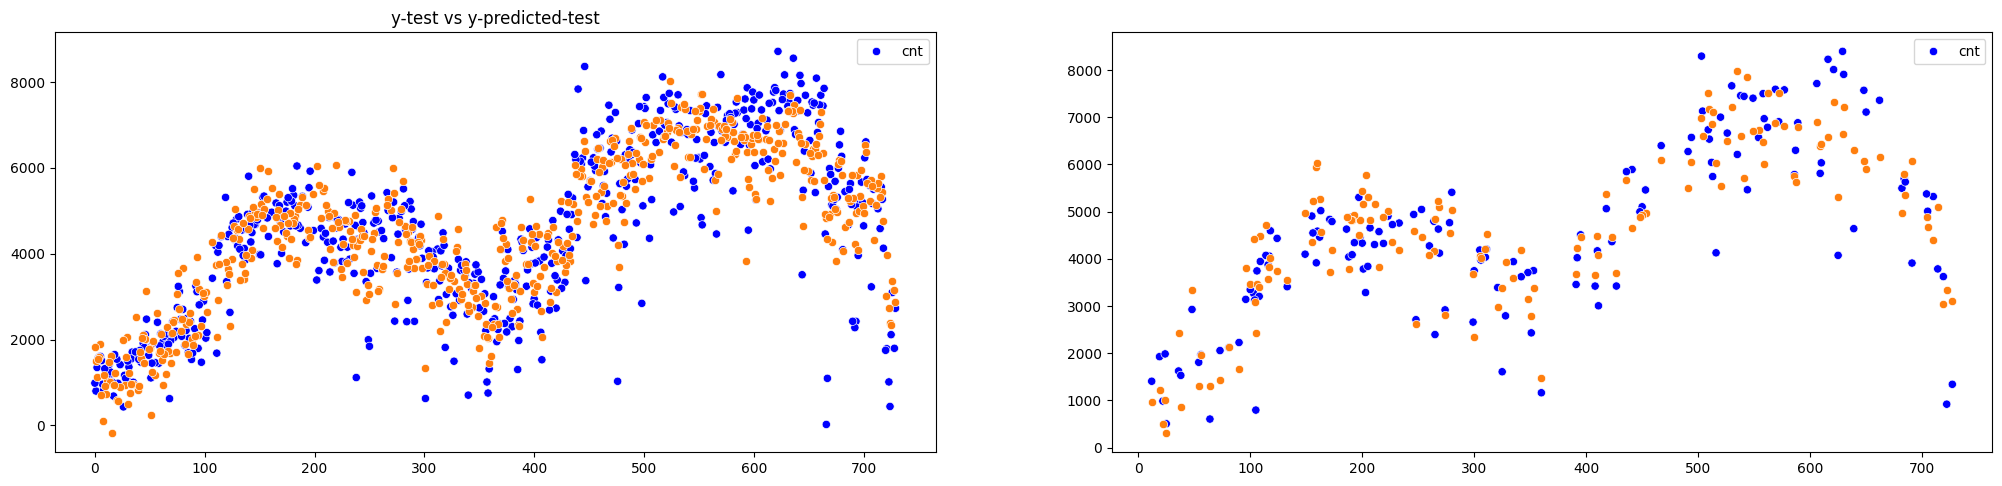

In [127]:
pyplot.figure(figsize=(25,12))
fig=pyplot.subplot(2,2,1)
sns.scatterplot(y_train,palette='blend:blue,yellow')
sns.scatterplot(y_pred_train_model13,palette='blend:red,yellow')
fig.set_title("y-train vs y-predicted-train")
pyplot.subplot(2,2,2)
sns.scatterplot(y_test,palette='blend:blue,yellow')
sns.scatterplot(y_pred_test_model13,palette='blend:red,yellow')
fig.set_title("y-test vs y-predicted-test")
pyplot.show()

#### R-square evaluation of Training Set

In [128]:
round(r2_score(y_train,y_pred_train_model13),2)

0.8

#### R-square evaluation of Test Set

In [129]:
round(r2_score(y_test,y_pred_test_model13),2)

0.75

#### Q-Q Plots of Residuals

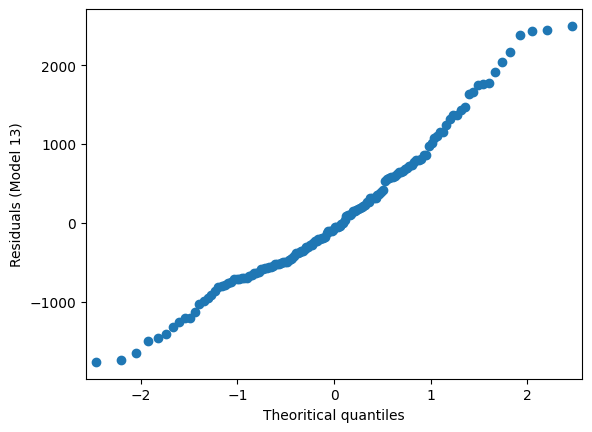

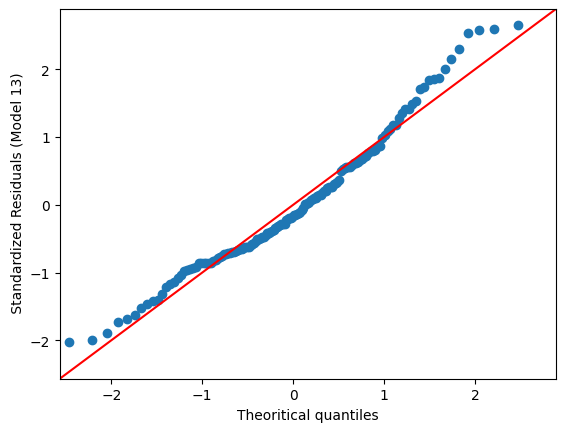

In [130]:
sm.qqplot(error['error_model13'],dist=stats.norm)
pyplot.xlabel("Theoritical quantiles")
pyplot.ylabel("Residuals (Model 13)")
pyplot.show()
sm.qqplot(error['error_model13'],line='45',fit=True,dist=stats.norm)
pyplot.xlabel("Theoritical quantiles")
pyplot.ylabel(" Standardized Residuals (Model 13)")
pyplot.show()

#### Inference 
<font color='brown'>
1. The scatter plot between y_train and y_train_predicted by the model does not show any major deviation <br/>
2. The scatter plot between y_test and y_test_predicted by the model does not show any major deviation <br/>
3. The Q-Q plot and histogram of residuals shows the residuals follows normal distribution
</font>

#### Rebuilding the model with sklearn

In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
lr=LinearRegression()

In [168]:
lr.fit(X_train[['atemp','yr','Cloudy','windspeed','September','Summer','Winter','holiday','Saturday']],y_train)

LinearRegression()

In [169]:
y_pred_lr=lr.predict(X_train[['atemp','yr','Cloudy','windspeed','September','Summer','Winter','holiday','Saturday']])

In [170]:
r2_score(y_train,y_pred_lr)

0.8041851852301394

In [171]:
coeff=pd.DataFrame({'features':[],'coeff':[]})
coeff['features']=['atemp','yr','Cloudy','windspeed','September','Summer','Winter','holiday','Saturday']
coeff['coeff']=lr.coef_[0]

In [172]:
coeff

,features,coeff
0,atemp,5348.475144
1,yr,2024.175202
2,Cloudy,785.481733
3,windspeed,-1413.302719
4,September,634.883993
5,Summer,706.053065
6,Winter,1039.872419
7,holiday,-589.458931
8,Saturday,268.788604


#### Conclusion

1. The Model can be explained as a linear equation below 

<font color='brown'> 
<b>
 5348.48 * atemp + 2024.18 * yr +785.48 * Cloudy + 634.88* September + 706.05 * Summer </br>
 + 1039.87 * Winter + 268.78*Saturday </br>
 - 589.49 * holiday- windspeed * -1413.30
</b>
</font>

2. The driver variables effectively increasing the demand in the upcoming year are
<font color='brown'><b>
    1. Feeling Temperature
    2. Season (Summer)
    3. Cloudy Weather
</b></font>
Boom bikes can plan for the upcoming years considering the above variables 